# Práctica 43: Limpieza, manejo y transformación de datos con Pandas

####  Cargar el fichero **retail2.csv** en un dataframe de Pandas y efectuar todas las operaciones de consulta, exploración y limpieza de datos que sean necesarios algunos pasos de limpieza están de forma explícita como preguntas. Los ficheros contienen varias columnas y algunas de ellas tienen datos que podrían necesitar limpieza o tratamiento. 

**El fichero contiene información sobre transacciones de una tienda minorista. Los campos y su significado se muestran a continuación:**

`InvoiceNo`: Número de factura que identifica de manera única cada transacción.
  

`StockCode`:Código de stock que identifica de manera única cada producto.
 

`Descrption`.Descripción del producto.


`Quantity`: Cantidad de productos comprados (puede contener valores negativos que indican devoluciones).

`InvoiceDate`: Fecha y hora en que se realizó la transacción.


`UnitPrice`:Precio unitario del producto (algunos valores pueden estar en centavos en lugar de dólares).


`CustomerID`:ID único del cliente que realizó la compra.


`Country`:País donde reside el cliente (puede contener inconsistencias en mayúsculas/minúsculas y caracteres especiales).  

`CustomerName`:Nombre completo del cliente.


`Email`:Dirección de correo electrónico del cliente.  

`Address`:Dirección del cliente.  



`PhoneNumber`:Número de teléfono del cliente.



`Category`: Categoría del producto (por ejemplo, 'Electronics', 'Clothing', 'Home & Garden').

`Supplier`: Proveedor del producto.  

`StockLevel`: Nivel de inventario del producto.

`Discount`: Descuento aplicado al producto (en porcentaje).  

`SaleChannel`: Canal de venta (por ejemplo, 'Online', 'In-Store').

`ReturnStatus`: Estado de devolución del producto ('Returned', 'Not Returned').

`ProductWeight`: Peso del producto. Unidad: kilogramos.

`ProductDimensions`: Dimensiones del producto. Unidad: en el formato 'LxWxH cm'.

`ShippingCost`: Costo de envío. Unidad:dólares.

`SalesRegion`: Región de ventas (por ejemplo, 'North America', 'Europe', 'Asia').  

`PromotionCode`: Código de promoción aplicado a la compra.

`PaymentMethod`: Método de pago (por ejemplo, 'Credit Card', 'PayPal', 'Bank Transfer').


# Parte 1. Data Cleaning and Preparation (Capítulo 7 - Wes McKinney)

- Cargue los datasets `retail2.csv` y `exchange_rates.csv` en DataFrames de pandas.

In [6]:
import pandas as pd

try:
    # Intentar cargar los archivos CSV en DataFrames de pandas
    retail_df = pd.read_csv('retail2.csv', delimiter=';', on_bad_lines='skip', encoding='utf-8')
    exchange_rates_df = pd.read_csv('exchange_rates.csv', delimiter=',', on_bad_lines='skip', encoding='utf-8')

    # Mostrar las primeras filas de cada DataFrame para verificar la carga correcta
    print("Retail DataFrame:")
    print(retail_df.head())

    print("\nExchange Rates DataFrame:")
    print(exchange_rates_df.head())

except pd.errors.ParserError as e:
    print(f"Error al parsear los archivos CSV: {e}")
except Exception as e:
    print(f"Error: {e}")










Retail DataFrame:
   InvoiceNo StockCode                                        Description  \
0   536578.0     84969  ["description": "BOX OF 6 ASSORTED COLOUR TEAS...   
1   536446.0     21756                                DOORMAT NEW ENGLAND   
2   536633.0     22632                          HAND WARMER RED POLKA DOT   
3   536522.0     22111       {"description": "SCANDINAVIAN REDS RIBBONS"}   
4        NaN     22634    {"description": "BAKING SET 9 PIECE RETROSPOT"}   

  Quantity       InvoiceDate UnitPrice  CustomerID         Country  \
0        6  12/01/2010 12:28      4.25       17763  United Kingdom   
1      100  12/01/2010 10:16     795.0       15939  United Kingdom   
2        6  12/01/2010 13:23      1.85       12295  United Kingdom   
3       10  12/01/2010 11:32      1.65       15685  United Kingdom   
4        6  12/02/2010 11:07      4.95       11696  United Kingdom   

     CustomerName                      Email  ... StockLevel Discount  \
0   David Johnson     dav

## Pregunta 1
**Identificación de valores faltantes:**
- Identifique las columnas con valores faltantes en el dataset `retail`.

In [7]:

# Mostrar la cantidad de valores faltantes por columna en el DataFrame de retail
missing_values_retail = retail_df.isnull().sum()
print("Valores faltantes en el DataFrame de retail:")
print(missing_values_retail)

# Mostrar la cantidad de valores faltantes por columna en el DataFrame de exchange rates
missing_values_exchange_rates = exchange_rates_df.isnull().sum()
print("\nValores faltantes en el DataFrame de exchange rates:")
print(missing_values_exchange_rates)



Valores faltantes en el DataFrame de retail:
InvoiceNo            20
StockCode             0
Description          27
Quantity              0
InvoiceDate           0
UnitPrice             0
CustomerID            0
Country               1
CustomerName          0
Email                 0
Address               0
PhoneNumber           0
Category              0
Supplier              0
StockLevel            0
Discount              0
SaleChannel           0
ReturnStatus          0
ProductWeight         0
ProductDimensions     0
ShippingCost          0
SalesRegion           0
PromotionCode        81
PaymentMethod         0
dtype: int64

Valores faltantes en el DataFrame de exchange rates:
Date            0
ExchangeRate    0
dtype: int64


## Pregunta 2
**Eliminar valores faltantes:**
- Elimine las filas del dataset `retail` donde las columnas críticas (`InvoiceNo`, `StockCode`, `Quantity`, `UnitPrice`, `CustomerID`) tengan valores faltantes.

In [8]:
import pandas as pd

# Cargar los archivos CSV en DataFrames de pandas
retail_df = pd.read_csv('retail2.csv', delimiter=';', on_bad_lines='skip', encoding='utf-8')
exchange_rates_df = pd.read_csv('exchange_rates.csv', delimiter=',', on_bad_lines='skip', encoding='utf-8')

# Mostrar las primeras filas de cada DataFrame para verificar la carga correcta
print("Retail DataFrame antes de eliminar filas con valores faltantes:")
print(retail_df.head())

# Eliminar filas donde las columnas críticas tengan valores faltantes
columnas_criticas = ['InvoiceNo', 'StockCode', 'Quantity', 'UnitPrice', 'CustomerID']
retail_df = retail_df.dropna(subset=columnas_criticas)

# Mostrar el DataFrame después de eliminar las filas
print("\nRetail DataFrame después de eliminar filas con valores faltantes:")
print(retail_df.head())

# Verificar que no hay valores faltantes en las columnas críticas
missing_values_criticas = retail_df[columnas_criticas].isnull().sum()
print("\nValores faltantes en las columnas críticas después de la limpieza:")
print(missing_values_criticas)



Retail DataFrame antes de eliminar filas con valores faltantes:
   InvoiceNo StockCode                                        Description  \
0   536578.0     84969  ["description": "BOX OF 6 ASSORTED COLOUR TEAS...   
1   536446.0     21756                                DOORMAT NEW ENGLAND   
2   536633.0     22632                          HAND WARMER RED POLKA DOT   
3   536522.0     22111       {"description": "SCANDINAVIAN REDS RIBBONS"}   
4        NaN     22634    {"description": "BAKING SET 9 PIECE RETROSPOT"}   

  Quantity       InvoiceDate UnitPrice  CustomerID         Country  \
0        6  12/01/2010 12:28      4.25       17763  United Kingdom   
1      100  12/01/2010 10:16     795.0       15939  United Kingdom   
2        6  12/01/2010 13:23      1.85       12295  United Kingdom   
3       10  12/01/2010 11:32      1.65       15685  United Kingdom   
4        6  12/02/2010 11:07      4.95       11696  United Kingdom   

     CustomerName                      Email  ... St

## Pregunta 3
**Conversión de tipos de datos:**
- Convierta la columna `InvoiceDate` del dataset `retail` a un formato de datetime.

In [9]:

# Convertir la columna InvoiceDate a formato datetime
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'], format='%d/%m/%Y %H:%M')

# Mostrar el DataFrame después de la conversión
print("\nRetail DataFrame después de la conversión de InvoiceDate:")
print(retail_df.head())

# Verificar el tipo de dato de la columna InvoiceDate
print("\nTipo de dato de la columna InvoiceDate después de la conversión:")
print(retail_df['InvoiceDate'].dtype)





Retail DataFrame después de la conversión de InvoiceDate:
   InvoiceNo StockCode                                        Description  \
0   536578.0     84969  ["description": "BOX OF 6 ASSORTED COLOUR TEAS...   
1   536446.0     21756                                DOORMAT NEW ENGLAND   
2   536633.0     22632                          HAND WARMER RED POLKA DOT   
3   536522.0     22111       {"description": "SCANDINAVIAN REDS RIBBONS"}   
5   536694.0     22960      {"description": ["JAM MAKING SET WITH JARS"]}   

  Quantity         InvoiceDate UnitPrice  CustomerID         Country  \
0        6 2010-01-12 12:28:00      4.25       17763  United Kingdom   
1      100 2010-01-12 10:16:00     795.0       15939  United Kingdom   
2        6 2010-01-12 13:23:00      1.85       12295  United Kingdom   
3       10 2010-01-12 11:32:00      1.65       15685  United Kingdom   
5        6 2010-01-12 14:24:00      4.25       11946  United Kingdom   

     CustomerName                      Email 

## Pregunta 4
**Conversión de tipos de datos en tasas de cambio:**
- Convierta la columna `Date` del dataset `exchange_rates.csv` a un formato de datetime.

In [11]:
# Mostrar las primeras filas del DataFrame exchange_rates antes de la conversión
print("Exchange Rates DataFrame antes de la conversión:")
print(exchange_rates_df.head())

# Convertir la columna Date a formato datetime
exchange_rates_df['Date'] = pd.to_datetime(exchange_rates_df['Date'], format='%Y-%m-%d')

# Mostrar el DataFrame después de la conversión
print("\nExchange Rates DataFrame después de la conversión de Date:")
print(exchange_rates_df.head())

# Verificar el tipo de dato de la columna Date después de la conversión
print("\nTipo de dato de la columna Date después de la conversión:")
print(exchange_rates_df['Date'].dtype)


Exchange Rates DataFrame antes de la conversión:
         Date  ExchangeRate
0  2020-01-01          1.20
1  2020-01-02          1.19
2  2020-01-03          1.18
3  2020-01-04          1.21
4  2020-01-05          1.20

Exchange Rates DataFrame después de la conversión de Date:
        Date  ExchangeRate
0 2020-01-01          1.20
1 2020-01-02          1.19
2 2020-01-03          1.18
3 2020-01-04          1.21
4 2020-01-05          1.20

Tipo de dato de la columna Date después de la conversión:
datetime64[ns]


## Pregunta 5
**Filtrado de datos por país:**
- Filtre el dataset `retail` para mostrar solo las transacciones realizadas en el país 'United Kingdom'.

In [13]:
# Obtener la lista de todos los países únicos en el dataset retail_df
paises_unicos = retail_df['Country'].unique()

# Mostrar la lista de países únicos
print("Lista de países únicos en el dataset retail_df:")
print(paises_unicos)


Lista de países únicos en el dataset retail_df:
['United Kingdom' '### FELTCRAFT PRINCESS CHARLOTTE DOLL ###'
 'KNITTED UNION FLAG HOT WATER BOTTLE' 'U.K.'
 'STRIPED CHARLIE+LOLA CHARLOTTE BAG: details' 'Germany'
 '### united kingdom ###' 'BOX OF VINTAGE JIGSAW BLOCKS' 'united kingdom'
 'England' 'SCANDINAVIAN REDS RIBBONS'
 '### CHOCOLATE HOT WATER BOTTLE ###' 'Denmark' nan '### U.K. ###'
 'BOX OF VINTAGE ALPHABET BLOCKS' 'RED HARMONICA IN BOX']


In [16]:
# Cargar los archivos CSV en DataFrames de pandas
retail_df = pd.read_csv('retail2.csv', delimiter=';', on_bad_lines='skip', encoding='utf-8')

# Diccionario de reemplazos de nombres de países
country_replacements = {
    'United Kingdom': 'United Kingdom',
    'U.K.': 'United Kingdom',
    'England': 'United Kingdom',
    '### U.K. ###': 'United Kingdom',
    '### united kingdom ###': 'United Kingdom',
    'united kingdom': 'United Kingdom',
    '### FELTCRAFT PRINCESS CHARLOTTE DOLL ###': 'United Kingdom',
    'KNITTED UNION FLAG HOT WATER BOTTLE': 'United Kingdom',
    'STRIPED CHARLIE+LOLA CHARLOTTE BAG: details': 'United Kingdom',
    'BOX OF VINTAGE JIGSAW BLOCKS': 'United Kingdom',
    'SCANDINAVIAN REDS RIBBONS': 'United Kingdom',
    '### CHOCOLATE HOT WATER BOTTLE ###': 'United Kingdom',
    'BOX OF VINTAGE ALPHABET BLOCKS': 'United Kingdom',
    'RED HARMONICA IN BOX': 'United Kingdom',
    'Germany': 'Germany',
    'Denmark': 'Denmark'
}

# Reemplazar los nombres de países en el DataFrame
retail_df['Country'] = retail_df['Country'].replace(country_replacements)

# Obtener la lista de todos los países únicos después de la corrección
paises_unicos_corregidos = retail_df['Country'].unique()

# Mostrar la lista de países únicos corregidos
print("Lista de países únicos en el dataset retail_df después de la corrección:")
print(paises_unicos_corregidos)

Lista de países únicos en el dataset retail_df después de la corrección:
['United Kingdom' 'Germany' 'Denmark' nan]


In [17]:
# Filtrar el DataFrame para mostrar solo las transacciones realizadas en 'United Kingdom'
retail_uk_df = retail_df[retail_df['Country'] == 'United Kingdom']

# Mostrar las primeras filas del DataFrame filtrado
print("Transacciones realizadas en 'United Kingdom':")
print(retail_uk_df.head())

Transacciones realizadas en 'United Kingdom':
   InvoiceNo StockCode                                        Description  \
0   536578.0     84969  ["description": "BOX OF 6 ASSORTED COLOUR TEAS...   
1   536446.0     21756                                DOORMAT NEW ENGLAND   
2   536633.0     22632                          HAND WARMER RED POLKA DOT   
3   536522.0     22111       {"description": "SCANDINAVIAN REDS RIBBONS"}   
4        NaN     22634    {"description": "BAKING SET 9 PIECE RETROSPOT"}   

  Quantity       InvoiceDate UnitPrice  CustomerID         Country  \
0        6  12/01/2010 12:28      4.25       17763  United Kingdom   
1      100  12/01/2010 10:16     795.0       15939  United Kingdom   
2        6  12/01/2010 13:23      1.85       12295  United Kingdom   
3       10  12/01/2010 11:32      1.65       15685  United Kingdom   
4        6  12/02/2010 11:07      4.95       11696  United Kingdom   

     CustomerName                      Email  ... StockLevel Discount 

voy a guardar todos los cambios hechos en fichero retail3.csv

In [31]:
import pandas as pd

# Cargar los archivos CSV en DataFrames de pandas
retail_df = pd.read_csv('retail2.csv', delimiter=';', on_bad_lines='skip', encoding='utf-8')

# Diccionario de reemplazos de nombres de países
country_replacements = {
    'United Kingdom': 'United Kingdom',
    'U.K.': 'United Kingdom',
    'England': 'United Kingdom',
    '### U.K. ###': 'United Kingdom',
    '### united kingdom ###': 'United Kingdom',
    'united kingdom': 'United Kingdom',
    '### FELTCRAFT PRINCESS CHARLOTTE DOLL ###': 'United Kingdom',
    'KNITTED UNION FLAG HOT WATER BOTTLE': 'United Kingdom',
    'STRIPED CHARLIE+LOLA CHARLOTTE BAG: details': 'United Kingdom',
    'BOX OF VINTAGE JIGSAW BLOCKS': 'United Kingdom',
    'SCANDINAVIAN REDS RIBBONS': 'United Kingdom',
    '### CHOCOLATE HOT WATER BOTTLE ###': 'United Kingdom',
    'BOX OF VINTAGE ALPHABET BLOCKS': 'United Kingdom',
    'RED HARMONICA IN BOX': 'United Kingdom',
    'Germany': 'Germany',
    'Denmark': 'Denmark'
}

# Reemplazar los nombres de países en el DataFrame
retail_df['Country'] = retail_df['Country'].replace(country_replacements)

# Eliminar filas donde las columnas críticas tengan valores faltantes
columnas_criticas = ['InvoiceNo', 'StockCode', 'Quantity', 'UnitPrice', 'CustomerID']
retail3_df = retail_df.dropna(subset=columnas_criticas)

# Convertir la columna InvoiceDate a formato datetime
retail3_df.loc[:, 'InvoiceDate'] = pd.to_datetime(retail3_df['InvoiceDate'], format='%d/%m/%Y %H:%M')

# Convertir las columnas Quantity y UnitPrice a float, manejando errores
retail3_df.loc[:, 'Quantity'] = pd.to_numeric(retail3_df['Quantity'], errors='coerce')
retail3_df.loc[:, 'UnitPrice'] = pd.to_numeric(retail3_df['UnitPrice'], errors='coerce')

# Eliminar filas con valores NaN resultantes de la conversión a numérico
retail3_df = retail3_df.dropna(subset=['Quantity', 'UnitPrice'])

# Crear una nueva columna TotalPrice multiplicando Quantity por UnitPrice
retail3_df.loc[:, 'TotalPrice'] = retail3_df['Quantity'] * retail3_df['UnitPrice']

# Guardar el DataFrame modificado en un nuevo archivo CSV
retail3_df.to_csv('retail3.csv', index=False, encoding='utf-8')

print("El DataFrame modificado ha sido guardado en 'retail3.csv'")




El DataFrame modificado ha sido guardado en 'retail3.csv'


## Pregunta 6
**Calcular el total de precios:**
- Cree una nueva columna `TotalPrice` en el dataset `retail3` multiplicando `Quantity` por `UnitPrice`.

In [32]:
# Crear una nueva columna TotalPrice multiplicando Quantity por UnitPrice
retail3_df['TotalPrice'] = retail3_df['Quantity'] * retail3_df['UnitPrice']

# Mostrar las primeras filas del DataFrame con la nueva columna TotalPrice
print("DataFrame con la columna TotalPrice:")
print(retail3_df.head())

# Guardar el DataFrame modificado en un nuevo archivo CSV
retail3_df.to_csv('retail3.csv', index=False, encoding='utf-8')

print("El DataFrame modificado ha sido guardado en 'retail3.csv'")


DataFrame con la columna TotalPrice:
   InvoiceNo StockCode                                        Description  \
0   536578.0     84969  ["description": "BOX OF 6 ASSORTED COLOUR TEAS...   
1   536446.0     21756                                DOORMAT NEW ENGLAND   
2   536633.0     22632                          HAND WARMER RED POLKA DOT   
3   536522.0     22111       {"description": "SCANDINAVIAN REDS RIBBONS"}   
5   536694.0     22960      {"description": ["JAM MAKING SET WITH JARS"]}   

  Quantity          InvoiceDate UnitPrice  CustomerID         Country  \
0      6.0  2010-01-12 12:28:00      4.25       17763  United Kingdom   
1    100.0  2010-01-12 10:16:00     795.0       15939  United Kingdom   
2      6.0  2010-01-12 13:23:00      1.85       12295  United Kingdom   
3     10.0  2010-01-12 11:32:00      1.65       15685  United Kingdom   
5      6.0  2010-01-12 14:24:00      4.25       11946  United Kingdom   

     CustomerName                      Email  ... Discount Sa

## Pregunta 7
**Extraer mes y año:**
- Extraiga el mes y el año de la columna `InvoiceDate` y cree dos nuevas columnas: `InvoiceMonth` y `InvoiceYear`.

In [33]:
# Asegúrate de que la columna InvoiceDate esté en formato datetime
retail3_df['InvoiceDate'] = pd.to_datetime(retail3_df['InvoiceDate'], format='%d/%m/%Y %H:%M')

# Extraer el mes y el año de la columna InvoiceDate
retail3_df['InvoiceMonth'] = retail3_df['InvoiceDate'].dt.month
retail3_df['InvoiceYear'] = retail3_df['InvoiceDate'].dt.year

# Mostrar las primeras filas del DataFrame con las nuevas columnas
print("DataFrame con las columnas InvoiceMonth e InvoiceYear:")
print(retail3_df[['InvoiceDate', 'InvoiceMonth', 'InvoiceYear']].head())

# Guardar el DataFrame modificado en un nuevo archivo CSV
retail3_df.to_csv('retail3.csv', index=False, encoding='utf-8')

print("El DataFrame modificado ha sido guardado en 'retail3.csv'")








DataFrame con las columnas InvoiceMonth e InvoiceYear:
          InvoiceDate  InvoiceMonth  InvoiceYear
0 2010-01-12 12:28:00             1         2010
1 2010-01-12 10:16:00             1         2010
2 2010-01-12 13:23:00             1         2010
3 2010-01-12 11:32:00             1         2010
5 2010-01-12 14:24:00             1         2010
El DataFrame modificado ha sido guardado en 'retail3.csv'


## Pregunta 8
**Eliminar duplicados:**
- Identifique y elimine las filas duplicadas en el dataset `retail3` basadas en la combinación de `InvoiceNo` y `StockCode`.

In [34]:
# Eliminar duplicados basados en la combinación de InvoiceNo y StockCode
retail3_df = retail3_df.drop_duplicates(subset=['InvoiceNo', 'StockCode'])

# Mostrar las primeras filas del DataFrame después de eliminar duplicados
print("DataFrame después de eliminar duplicados basados en InvoiceNo y StockCode:")
print(retail3_df.head())

# Guardar el DataFrame modificado en un nuevo archivo CSV
retail3_df.to_csv('retail3.csv', index=False, encoding='utf-8')

print("El DataFrame modificado ha sido guardado en 'retail3.csv'")



DataFrame después de eliminar duplicados basados en InvoiceNo y StockCode:
   InvoiceNo StockCode                                        Description  \
0   536578.0     84969  ["description": "BOX OF 6 ASSORTED COLOUR TEAS...   
1   536446.0     21756                                DOORMAT NEW ENGLAND   
2   536633.0     22632                          HAND WARMER RED POLKA DOT   
3   536522.0     22111       {"description": "SCANDINAVIAN REDS RIBBONS"}   
5   536694.0     22960      {"description": ["JAM MAKING SET WITH JARS"]}   

  Quantity         InvoiceDate UnitPrice  CustomerID         Country  \
0      6.0 2010-01-12 12:28:00      4.25       17763  United Kingdom   
1    100.0 2010-01-12 10:16:00     795.0       15939  United Kingdom   
2      6.0 2010-01-12 13:23:00      1.85       12295  United Kingdom   
3     10.0 2010-01-12 11:32:00      1.65       15685  United Kingdom   
5      6.0 2010-01-12 14:24:00      4.25       11946  United Kingdom   

     CustomerName            

## Pregunta 9
**Reemplazo de valores:**
- Reemplace todos los valores negativos en la columna `Quantity` con cero.

In [35]:
# Reemplazar valores negativos en la columna Quantity con cero
retail3_df['Quantity'] = retail3_df['Quantity'].apply(lambda x: max(x, 0))

# Mostrar las primeras filas del DataFrame después de reemplazar los valores negativos
print("DataFrame después de reemplazar valores negativos en la columna Quantity:")
print(retail3_df.head())

# Guardar el DataFrame modificado en un nuevo archivo CSV
retail3_df.to_csv('retail3.csv', index=False, encoding='utf-8')

print("El DataFrame modificado ha sido guardado en 'retail3.csv'")



DataFrame después de reemplazar valores negativos en la columna Quantity:
   InvoiceNo StockCode                                        Description  \
0   536578.0     84969  ["description": "BOX OF 6 ASSORTED COLOUR TEAS...   
1   536446.0     21756                                DOORMAT NEW ENGLAND   
2   536633.0     22632                          HAND WARMER RED POLKA DOT   
3   536522.0     22111       {"description": "SCANDINAVIAN REDS RIBBONS"}   
5   536694.0     22960      {"description": ["JAM MAKING SET WITH JARS"]}   

   Quantity         InvoiceDate UnitPrice  CustomerID         Country  \
0       6.0 2010-01-12 12:28:00      4.25       17763  United Kingdom   
1     100.0 2010-01-12 10:16:00     795.0       15939  United Kingdom   
2       6.0 2010-01-12 13:23:00      1.85       12295  United Kingdom   
3      10.0 2010-01-12 11:32:00      1.65       15685  United Kingdom   
5       6.0 2010-01-12 14:24:00      4.25       11946  United Kingdom   

     CustomerName       

## Pregunta 10
**Transformación de datos:**
- Cree una nueva columna `DiscountedPrice` aplicando un descuento del 10% al `TotalPrice`.

In [36]:
# Crear una nueva columna DiscountedPrice aplicando un descuento del 10% al TotalPrice
retail3_df['DiscountedPrice'] = retail3_df['TotalPrice'] * 0.9

# Mostrar las primeras filas del DataFrame con la nueva columna DiscountedPrice
print("DataFrame con la columna DiscountedPrice:")
print(retail3_df[['TotalPrice', 'DiscountedPrice']].head())

# Guardar el DataFrame modificado en un nuevo archivo CSV
retail3_df.to_csv('retail3.csv', index=False, encoding='utf-8')

print("El DataFrame modificado ha sido guardado en 'retail3.csv'")




DataFrame con la columna DiscountedPrice:
  TotalPrice DiscountedPrice
0       25.5           22.95
1    79500.0         71550.0
2       11.1            9.99
3       16.5           14.85
5       25.5           22.95
El DataFrame modificado ha sido guardado en 'retail3.csv'


# Parte 2. Data Wrangling: Join, Combine, and Reshape (Capítulo 8)

## Pregunta 11
**Merge de datasets:**
- Realice un merge del dataset `retail` con el dataset `exchange_rates.csv` en las columnas de fecha (`InvoiceDate` de `retail` y `Date` de `exchange_rates.csv`).

In [37]:
import pandas as pd

# Cargar los datasets
retail3_df = pd.read_csv('retail3.csv', delimiter=',', encoding='utf-8')
exchange_rates_df = pd.read_csv('exchange_rates.csv', delimiter=',', encoding='utf-8')

# Asegurarse de que las columnas de fecha estén en el formato datetime
retail3_df['InvoiceDate'] = pd.to_datetime(retail3_df['InvoiceDate'])
exchange_rates_df['Date'] = pd.to_datetime(exchange_rates_df['Date'])

# Agregar una columna de solo fecha a retail3_df para el merge
retail3_df['InvoiceDateOnly'] = retail3_df['InvoiceDate'].dt.date
exchange_rates_df['DateOnly'] = exchange_rates_df['Date'].dt.date

# Realizar el merge en las columnas de fecha
merged_df = pd.merge(retail3_df, exchange_rates_df, left_on='InvoiceDateOnly', right_on='DateOnly', how='left')

# Mostrar las primeras filas del DataFrame combinado
print("DataFrame combinado después del merge:")
print(merged_df.head())

# Guardar el DataFrame combinado en un nuevo archivo CSV
merged_df.to_csv('retail_merged.csv', index=False, encoding='utf-8')

print("El DataFrame combinado ha sido guardado en 'retail_merged.csv'")


DataFrame combinado después del merge:
   InvoiceNo StockCode                                        Description  \
0   536578.0     84969  ["description": "BOX OF 6 ASSORTED COLOUR TEAS...   
1   536446.0     21756                                DOORMAT NEW ENGLAND   
2   536633.0     22632                          HAND WARMER RED POLKA DOT   
3   536522.0     22111       {"description": "SCANDINAVIAN REDS RIBBONS"}   
4   536694.0     22960      {"description": ["JAM MAKING SET WITH JARS"]}   

   Quantity         InvoiceDate  UnitPrice  CustomerID         Country  \
0       6.0 2010-01-12 12:28:00       4.25       17763  United Kingdom   
1     100.0 2010-01-12 10:16:00     795.00       15939  United Kingdom   
2       6.0 2010-01-12 13:23:00       1.85       12295  United Kingdom   
3      10.0 2010-01-12 11:32:00       1.65       15685  United Kingdom   
4       6.0 2010-01-12 14:24:00       4.25       11946  United Kingdom   

     CustomerName                      Email  ... Pro

## Pregunta 12
**Concatenación de datasets:**
- Concatenar dos subconjuntos del dataset `retail`, uno con las primeras 100 filas y otro con las últimas 100 filas.

In [38]:
import pandas as pd

# Cargar el dataset retail3
retail3_df = pd.read_csv('retail3.csv', delimiter=',', encoding='utf-8')

# Obtener las primeras 100 filas y las últimas 100 filas
primeras_100_filas = retail3_df.head(100)
ultimas_100_filas = retail3_df.tail(100)

# Concatenar los dos subconjuntos
concatenado_df = pd.concat([primeras_100_filas, ultimas_100_filas])

# Mostrar las primeras filas del DataFrame concatenado
print("DataFrame concatenado:")
print(concatenado_df.head(110))  # Mostrar más filas para ver las uniones

# Guardar el DataFrame concatenado en un nuevo archivo CSV
concatenado_df.to_csv('retail_concatenado.csv', index=False, encoding='utf-8')

print("El DataFrame concatenado ha sido guardado en 'retail_concatenado.csv'")


DataFrame concatenado:
     InvoiceNo                  StockCode  \
0     536578.0                      84969   
1     536446.0                      21756   
2     536633.0                      22632   
3     536522.0                      22111   
4     536694.0                      22960   
..         ...                        ...   
278   536423.0                      22749   
279   536379.0  SCANDINAVIAN REDS RIBBONS   
280   536498.0                      22111   
281   536463.0                      21723   
282   536431.0                      84988   

                                           Description  Quantity  \
0    ["description": "BOX OF 6 ASSORTED COLOUR TEAS...       6.0   
1                                  DOORMAT NEW ENGLAND     100.0   
2                            HAND WARMER RED POLKA DOT       6.0   
3         {"description": "SCANDINAVIAN REDS RIBBONS"}      10.0   
4        {"description": ["JAM MAKING SET WITH JARS"]}       6.0   
..                          

## Pregunta 13
**Pivot table:**
- Cree una tabla dinámica (pivot table) que muestre el total de `TotalPrice` para cada `Country` y `InvoiceYear`.

In [39]:
# Crear la tabla dinámica
pivot_table = retail3_df.pivot_table(
    values='TotalPrice', 
    index='Country', 
    columns='InvoiceYear', 
    aggfunc='sum', 
    fill_value=0
)

# Mostrar la tabla dinámica
print("Tabla dinámica (pivot table) del total de TotalPrice para cada Country y InvoiceYear:")
print(pivot_table)

# Guardar la tabla dinámica en un nuevo archivo CSV
pivot_table.to_csv('pivot_table_total_price.csv', encoding='utf-8')

print("La tabla dinámica ha sido guardada en 'pivot_table_total_price.csv'")

Tabla dinámica (pivot table) del total de TotalPrice para cada Country y InvoiceYear:
InvoiceYear       2009       2010      2011
Country                                    
Denmark         600.32    4746.09  41940.98
Germany         319.95   58484.21  15396.70
United Kingdom  191.10  119571.87   1834.65
La tabla dinámica ha sido guardada en 'pivot_table_total_price.csv'


## Pregunta 14
**Reshape con melt:**
- Transforme el dataset `retail` de formato ancho a largo usando la función `melt` de pandas.

In [40]:
# Transformar el DataFrame de formato ancho a largo
id_vars = ['InvoiceNo', 'StockCode', 'InvoiceDate', 'CustomerID', 'Country']
value_vars = ['Quantity', 'UnitPrice', 'TotalPrice']

retail_long_df = pd.melt(retail3_df, id_vars=id_vars, value_vars=value_vars, var_name='Variable', value_name='Value')

# Mostrar las primeras filas del DataFrame transformado
print("DataFrame transformado de formato ancho a largo:")
print(retail_long_df.head())


DataFrame transformado de formato ancho a largo:
   InvoiceNo StockCode          InvoiceDate  CustomerID         Country  \
0   536578.0     84969  2010-01-12 12:28:00       17763  United Kingdom   
1   536446.0     21756  2010-01-12 10:16:00       15939  United Kingdom   
2   536633.0     22632  2010-01-12 13:23:00       12295  United Kingdom   
3   536522.0     22111  2010-01-12 11:32:00       15685  United Kingdom   
4   536694.0     22960  2010-01-12 14:24:00       11946  United Kingdom   

   Variable  Value  
0  Quantity    6.0  
1  Quantity  100.0  
2  Quantity    6.0  
3  Quantity   10.0  
4  Quantity    6.0  


## Pregunta 15
**Combinar datos con overlap:**
- Combine dos DataFrames con columnas `CustomerID` y `TotalPrice`, teniendo en cuenta el overlap entre los datos.

In [42]:
import pandas as pd

# Supongamos que estos son tus DataFrames existentes
# Cargar el primer DataFrame (ejemplo)
df1 = pd.read_csv('retail3.csv')

# Crear el segundo DataFrame de ejemplo
# (Asegúrate de cargar tu DataFrame real en lugar de este ejemplo)
df2 = pd.DataFrame({
    'CustomerID': [12345, 12350, 12351, 12346, 12352],
    'TotalPrice': [150, 250, 350, 450, 550]
})

# Combinar los dos DataFrames basado en CustomerID
combined_df = pd.merge(df1, df2, on='CustomerID', how='outer', suffixes=('_df1', '_df2'))

# Mostrar el DataFrame combinado
print("DataFrame combinado:")
print(combined_df)

# Guardar el DataFrame combinado en un nuevo archivo CSV
combined_df.to_csv('combined_retail.csv', index=False, encoding='utf-8')

print("El DataFrame combinado ha sido guardado en 'combined_retail.csv'")


DataFrame combinado:
     InvoiceNo StockCode                                        Description  \
0     536578.0     84969  ["description": "BOX OF 6 ASSORTED COLOUR TEAS...   
1     536446.0     21756                                DOORMAT NEW ENGLAND   
2     536633.0     22632                          HAND WARMER RED POLKA DOT   
3     536522.0     22111       {"description": "SCANDINAVIAN REDS RIBBONS"}   
4     536694.0     22960      {"description": ["JAM MAKING SET WITH JARS"]}   
..         ...       ...                                                ...   
372   536472.0     22632                          HAND WARMER RED POLKA DOT   
373        NaN       NaN                                                NaN   
374        NaN       NaN                                                NaN   
375        NaN       NaN                                                NaN   
376        NaN       NaN                                                NaN   

     Quantity          Invoice

## Pregunta 16
**Join con índices:**
- Realice un join de dos DataFrames basándose en los índices.

In [43]:
import pandas as pd

# Cargar el primer DataFrame (retail3)
retail3_df = pd.read_csv('retail3.csv', index_col='CustomerID')

# Crear el segundo DataFrame de ejemplo 
# Aquí, por simplicidad, estoy creando un DataFrame de ejemplo con índices que coincidan con CustomerID
df2 = pd.DataFrame({
    'CustomerID': [12345, 12346, 12350, 12351, 12352],
    'Discount': [10, 15, 20, 25, 30]
}).set_index('CustomerID')

# Realizar el join de los dos DataFrames basándose en los índices
joined_df = retail3_df.join(df2, how='inner', lsuffix='_retail3', rsuffix='_df2')

# Mostrar el DataFrame combinado
print("DataFrame combinado:")
print(joined_df)

# Guardar el DataFrame combinado en un nuevo archivo CSV
joined_df.to_csv('joined_retail.csv', encoding='utf-8')

print("El DataFrame combinado ha sido guardado en 'joined_retail.csv'")


DataFrame combinado:
            InvoiceNo StockCode                      Description  Quantity  \
CustomerID                                                                   
12346        536406.0     22751  SET OF 7 BABUSHKA NESTING BOXES      10.0   

                    InvoiceDate  UnitPrice  Country CustomerName  \
CustomerID                                                         
12346       2010-01-12 09:36:00       7.65  Denmark  Jane Taylor   

                              Email     Address  ... ProductDimensions  \
CustomerID                                       ...                     
12346       jane.taylor@example.com  256 Oak St  ...       64x44x53 cm   

           ShippingCost SalesRegion  PromotionCode  PaymentMethod TotalPrice  \
CustomerID                                                                     
12346             11.49      Europe        PROMO10  Bank Transfer       76.5   

           InvoiceMonth  InvoiceYear DiscountedPrice  Discount_df2  
Custom

## Pregunta 17
**Cambio de nivel de índices:**
- Cambie los niveles de los índices en un MultiIndex en el dataset `retail`.

In [44]:


# Cargar el dataset retail3
retail3_df = pd.read_csv('retail3.csv', index_col=['InvoiceNo', 'StockCode'])

# Crear un MultiIndex para el ejemplo
retail3_df.set_index(['Country', 'InvoiceDate'], append=True, inplace=True)

# Mostrar el DataFrame con el MultiIndex
print("DataFrame con MultiIndex:")
print(retail3_df.head())

# Cambiar los niveles de los índices en el MultiIndex
retail3_swapped_df = retail3_df.swaplevel('Country', 'InvoiceDate')

# Mostrar el DataFrame con los niveles de índices cambiados
print("\nDataFrame con niveles de índices cambiados:")
print(retail3_swapped_df.head())

# Guardar el DataFrame modificado en un nuevo archivo CSV
retail3_swapped_df.to_csv('retail3_swapped.csv', encoding='utf-8')

print("El DataFrame con niveles de índices cambiados ha sido guardado en 'retail3_swapped.csv'")


DataFrame con MultiIndex:
                                                                                              Description  \
InvoiceNo StockCode Country        InvoiceDate                                                              
536578.0  84969     United Kingdom 2010-01-12 12:28:00  ["description": "BOX OF 6 ASSORTED COLOUR TEAS...   
536446.0  21756     United Kingdom 2010-01-12 10:16:00                                DOORMAT NEW ENGLAND   
536633.0  22632     United Kingdom 2010-01-12 13:23:00                          HAND WARMER RED POLKA DOT   
536522.0  22111     United Kingdom 2010-01-12 11:32:00       {"description": "SCANDINAVIAN REDS RIBBONS"}   
536694.0  22960     United Kingdom 2010-01-12 14:24:00      {"description": ["JAM MAKING SET WITH JARS"]}   

                                                        Quantity  UnitPrice  \
InvoiceNo StockCode Country        InvoiceDate                                
536578.0  84969     United Kingdom 2010-01-12 12:28:

## Pregunta 18
**Reordenamiento de niveles:**
- Reordene los niveles del índice en un DataFrame con MultiIndex.

In [45]:


# Cargar el dataset retail3
retail3_df = pd.read_csv('retail3.csv', index_col=['InvoiceNo', 'StockCode'])

# Crear un MultiIndex para el ejemplo
retail3_df.set_index(['Country', 'InvoiceDate'], append=True, inplace=True)

# Mostrar el DataFrame con el MultiIndex original
print("DataFrame con MultiIndex original:")
print(retail3_df.head())

# Reordenar los niveles del índice
# En este ejemplo, reordenamos los niveles a: 'InvoiceDate', 'Country', 'InvoiceNo', 'StockCode'
retail3_reordered_df = retail3_df.reorder_levels(['InvoiceDate', 'Country', 'InvoiceNo', 'StockCode'])

# Mostrar el DataFrame con los niveles de índices reordenados
print("\nDataFrame con niveles de índices reordenados:")
print(retail3_reordered_df.head())

# Guardar el DataFrame modificado en un nuevo archivo CSV
retail3_reordered_df.to_csv('retail3_reordered.csv', encoding='utf-8')

print("El DataFrame con niveles de índices reordenados ha sido guardado en 'retail3_reordered.csv'")


DataFrame con MultiIndex original:
                                                                                              Description  \
InvoiceNo StockCode Country        InvoiceDate                                                              
536578.0  84969     United Kingdom 2010-01-12 12:28:00  ["description": "BOX OF 6 ASSORTED COLOUR TEAS...   
536446.0  21756     United Kingdom 2010-01-12 10:16:00                                DOORMAT NEW ENGLAND   
536633.0  22632     United Kingdom 2010-01-12 13:23:00                          HAND WARMER RED POLKA DOT   
536522.0  22111     United Kingdom 2010-01-12 11:32:00       {"description": "SCANDINAVIAN REDS RIBBONS"}   
536694.0  22960     United Kingdom 2010-01-12 14:24:00      {"description": ["JAM MAKING SET WITH JARS"]}   

                                                        Quantity  UnitPrice  \
InvoiceNo StockCode Country        InvoiceDate                                
536578.0  84969     United Kingdom 2010-01-

## Pregunta 19
**Agregación por nivel:**
- Realice una agregación de los datos por nivel en un MultiIndex.

In [46]:


# Cargar el dataset retail3
retail3_df = pd.read_csv('retail3.csv', index_col=['InvoiceNo', 'StockCode'])

# Crear un MultiIndex para el ejemplo
retail3_df.set_index(['Country', 'InvoiceDate'], append=True, inplace=True)

# Mostrar el DataFrame con el MultiIndex original
print("DataFrame con MultiIndex original:")
print(retail3_df.head())

# Realizar una agregación por nivel (por ejemplo, sumando TotalPrice por Country)
aggregated_df = retail3_df.groupby(level='Country').agg({'TotalPrice': 'sum'})

# Mostrar el DataFrame con la agregación
print("\nDataFrame con la agregación por Country:")
print(aggregated_df)

# Guardar el DataFrame agregado en un nuevo archivo CSV
aggregated_df.to_csv('retail3_aggregated.csv', encoding='utf-8')

print("El DataFrame con la agregación ha sido guardado en 'retail3_aggregated.csv'")


DataFrame con MultiIndex original:
                                                                                              Description  \
InvoiceNo StockCode Country        InvoiceDate                                                              
536578.0  84969     United Kingdom 2010-01-12 12:28:00  ["description": "BOX OF 6 ASSORTED COLOUR TEAS...   
536446.0  21756     United Kingdom 2010-01-12 10:16:00                                DOORMAT NEW ENGLAND   
536633.0  22632     United Kingdom 2010-01-12 13:23:00                          HAND WARMER RED POLKA DOT   
536522.0  22111     United Kingdom 2010-01-12 11:32:00       {"description": "SCANDINAVIAN REDS RIBBONS"}   
536694.0  22960     United Kingdom 2010-01-12 14:24:00      {"description": ["JAM MAKING SET WITH JARS"]}   

                                                        Quantity  UnitPrice  \
InvoiceNo StockCode Country        InvoiceDate                                
536578.0  84969     United Kingdom 2010-01-

## Pregunta 20
**Creación de MultiIndex:**
- Cree un MultiIndex a partir de las columnas `Country` y `InvoiceYear` en el dataset `retail`.

In [47]:


# Cargar el dataset retail3
retail3_df = pd.read_csv('retail3.csv')

# Asegurarse de que la columna InvoiceDate esté en formato datetime
retail3_df['InvoiceDate'] = pd.to_datetime(retail3_df['InvoiceDate'])

# Crear la columna InvoiceYear a partir de InvoiceDate
retail3_df['InvoiceYear'] = retail3_df['InvoiceDate'].dt.year

# Crear el MultiIndex a partir de las columnas Country y InvoiceYear
retail3_df.set_index(['Country', 'InvoiceYear'], inplace=True)

# Mostrar el DataFrame con el nuevo MultiIndex
print("DataFrame con MultiIndex basado en Country e InvoiceYear:")
print(retail3_df.head())

# Guardar el DataFrame modificado en un nuevo archivo CSV
retail3_df.to_csv('retail3_multiindex.csv', encoding='utf-8')

print("El DataFrame con el nuevo MultiIndex ha sido guardado en 'retail3_multiindex.csv'")


DataFrame con MultiIndex basado en Country e InvoiceYear:
                            InvoiceNo StockCode  \
Country        InvoiceYear                        
United Kingdom 2010          536578.0     84969   
               2010          536446.0     21756   
               2010          536633.0     22632   
               2010          536522.0     22111   
               2010          536694.0     22960   

                                                                  Description  \
Country        InvoiceYear                                                      
United Kingdom 2010         ["description": "BOX OF 6 ASSORTED COLOUR TEAS...   
               2010                                       DOORMAT NEW ENGLAND   
               2010                                 HAND WARMER RED POLKA DOT   
               2010              {"description": "SCANDINAVIAN REDS RIBBONS"}   
               2010             {"description": ["JAM MAKING SET WITH JARS"]}   

                

# Parte 3 Data Aggregation and Group Operations (Capitulo 10)

## Pregunta 21
**Agrupación por cliente:**
- Agrupe los datos del dataset `retail` por `CustomerID` y calcule el total de `TotalPrice` por cliente.

In [49]:


# Cargar el dataset retail3
retail3_df = pd.read_csv('retail3.csv')

# Agrupar los datos por CustomerID y calcular el total de TotalPrice por cliente
total_price_by_customer = retail3_df.groupby('CustomerID').agg({'TotalPrice': 'sum'}).reset_index()

# Mostrar el DataFrame con el total de TotalPrice por cliente
print("Total de TotalPrice por CustomerID:")
print(total_price_by_customer.head())

# Guardar el DataFrame agregado en un nuevo archivo CSV
total_price_by_customer.to_csv('total_price_by_customer.csv', index=False, encoding='utf-8')

print("El DataFrame con el total de TotalPrice por cliente ha sido guardado en 'total_price_by_customer.csv'")


Total de TotalPrice por CustomerID:
   CustomerID  TotalPrice
0       10018       14.85
1       10049       15.30
2       10082       12.50
3       10112       20.34
4       10139       29.70
El DataFrame con el total de TotalPrice por cliente ha sido guardado en 'total_price_by_customer.csv'


## Pregunta 22
**Agrupación por producto:**
- Agrupe los datos del dataset `retail` por `StockCode` y calcule la cantidad total vendida (`Quantity`).

In [50]:


# Cargar el dataset retail3
retail3_df = pd.read_csv('retail3.csv')

# Agrupar los datos por StockCode y calcular la cantidad total vendida por producto
total_quantity_by_product = retail3_df.groupby('StockCode').agg({'Quantity': 'sum'}).reset_index()

# Mostrar el DataFrame con la cantidad total vendida por producto
print("Cantidad total vendida por StockCode:")
print(total_quantity_by_product.head())

# Guardar el DataFrame agregado en un nuevo archivo CSV
total_quantity_by_product.to_csv('total_quantity_by_product.csv', index=False, encoding='utf-8')

print("El DataFrame con la cantidad total vendida por producto ha sido guardado en 'total_quantity_by_product.csv'")


Cantidad total vendida por StockCode:
  StockCode  Quantity
0     21723     340.0
1     21724     190.0
2     21730      36.0
3     21731     168.0
4     21754      24.0
El DataFrame con la cantidad total vendida por producto ha sido guardado en 'total_quantity_by_product.csv'


## Pregunta 23
**Agrupación por mes y año:**
- Agrupe los datos del dataset `retail` por `InvoiceMonth` y `InvoiceYear`, y calcule el total de `TotalPrice`.

In [51]:
import pandas as pd

# Cargar el dataset retail3
retail3_df = pd.read_csv('retail3.csv')

# Asegurarse de que la columna InvoiceDate esté en formato datetime
retail3_df['InvoiceDate'] = pd.to_datetime(retail3_df['InvoiceDate'])

# Crear las columnas InvoiceMonth e InvoiceYear a partir de InvoiceDate
retail3_df['InvoiceMonth'] = retail3_df['InvoiceDate'].dt.month
retail3_df['InvoiceYear'] = retail3_df['InvoiceDate'].dt.year

# Agrupar los datos por InvoiceMonth e InvoiceYear y calcular el total de TotalPrice
total_price_by_month_year = retail3_df.groupby(['InvoiceMonth', 'InvoiceYear']).agg({'TotalPrice': 'sum'}).reset_index()

# Mostrar el DataFrame con el total de TotalPrice por mes y año
print("Total de TotalPrice por InvoiceMonth e InvoiceYear:")
print(total_price_by_month_year.head())

# Guardar el DataFrame agregado en un nuevo archivo CSV
total_price_by_month_year.to_csv('total_price_by_month_year.csv', index=False, encoding='utf-8')

print("El DataFrame con el total de TotalPrice por mes y año ha sido guardado en 'total_price_by_month_year.csv'")


Total de TotalPrice por InvoiceMonth e InvoiceYear:
   InvoiceMonth  InvoiceYear  TotalPrice
0             1         2010   182599.43
1             2         2009      123.58
2             2         2010       25.50
3             2         2011      -21.90
4             3         2009      116.16
El DataFrame con el total de TotalPrice por mes y año ha sido guardado en 'total_price_by_month_year.csv'


## Pregunta 24
**Conteo de transacciones:**
- Cuente el número total de transacciones por `Country` y `InvoiceYear`.

In [52]:


# Crear la columna InvoiceYear a partir de InvoiceDate
retail3_df['InvoiceYear'] = retail3_df['InvoiceDate'].dt.year

# Contar el número total de transacciones por Country e InvoiceYear
transaction_count_by_country_year = retail3_df.groupby(['Country', 'InvoiceYear']).size().reset_index(name='TransactionCount')

# Mostrar el DataFrame con el conteo de transacciones
print("Conteo de transacciones por Country e InvoiceYear:")
print(transaction_count_by_country_year.head())

# Guardar el DataFrame con el conteo de transacciones en un nuevo archivo CSV
transaction_count_by_country_year.to_csv('transaction_count_by_country_year.csv', index=False, encoding='utf-8')

print("El DataFrame con el conteo de transacciones ha sido guardado en 'transaction_count_by_country_year.csv'")


Conteo de transacciones por Country e InvoiceYear:
   Country  InvoiceYear  TransactionCount
0  Denmark         2009                27
1  Denmark         2010                74
2  Denmark         2011                 9
3  Germany         2009                15
4  Germany         2010                88
El DataFrame con el conteo de transacciones ha sido guardado en 'transaction_count_by_country_year.csv'


## Pregunta 25
**Función de agregación personalizada:**
- Cree una función de agregación personalizada que calcule el promedio y la desviación estándar de `TotalPrice` por `Country`.

In [56]:
import pandas as pd

# Cargar el dataset retail3
retail3_df = pd.read_csv('retail3.csv')

# Convertir la columna TotalPrice a numérico, reemplazando valores no numéricos con NaN y luego eliminándolos
retail3_df['TotalPrice'] = pd.to_numeric(retail3_df['TotalPrice'], errors='coerce')
retail3_df = retail3_df.dropna(subset=['TotalPrice'])

# Asegurarse de que los valores en TotalPrice sean de tipo float
print("Tipo de datos de TotalPrice después de la conversión:", retail3_df['TotalPrice'].dtype)

# Agrupar los datos por Country y aplicar la función de agregación predefinida
agg_result = retail3_df.groupby('Country')['TotalPrice'].agg(['mean', 'std']).reset_index()

# Renombrar las columnas para mayor claridad
agg_result.columns = ['Country', 'TotalPrice_mean', 'TotalPrice_std']

# Mostrar el DataFrame con el resultado de la agregación
print("Promedio y desviación estándar de TotalPrice por Country:")
print(agg_result)

# Guardar el DataFrame con el resultado de la agregación en un nuevo archivo CSV
agg_result.to_csv('totalprice_agg_by_country.csv', index=False, encoding='utf-8')

print("El DataFrame con el promedio y la desviación estándar de TotalPrice por Country ha sido guardado en 'totalprice_agg_by_country.csv'")






Tipo de datos de TotalPrice después de la conversión: float64
Promedio y desviación estándar de TotalPrice por Country:
          Country  TotalPrice_mean  TotalPrice_std
0         Denmark       429.885364     3982.488071
1         Germany       645.224870     3033.754791
2  United Kingdom       827.194694     6887.387466
El DataFrame con el promedio y la desviación estándar de TotalPrice por Country ha sido guardado en 'totalprice_agg_by_country.csv'


## Pregunta 26
**Agrupación y transformaciones:**
- Agrupe los datos por `CustomerID` y normalice el `TotalPrice` restando la media y dividiendo por la desviación estándar dentro de cada grupo.

In [61]:
import pandas as pd

# Cargar el dataset retail3
retail3_df = pd.read_csv('retail3.csv')

# Mostrar información general del dataset
print(retail3_df.info())

# Ver las primeras filas del dataset
print(retail3_df.head())

# Verificar si hay valores faltantes en las columnas relevantes
missing_values = retail3_df[['CustomerID', 'TotalPrice']].isnull().sum()
print("Valores faltantes en las columnas relevantes:")
print(missing_values)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceNo          373 non-null    float64
 1   StockCode          373 non-null    object 
 2   Description        349 non-null    object 
 3   Quantity           373 non-null    float64
 4   InvoiceDate        373 non-null    object 
 5   UnitPrice          373 non-null    float64
 6   CustomerID         373 non-null    int64  
 7   Country            372 non-null    object 
 8   CustomerName       373 non-null    object 
 9   Email              373 non-null    object 
 10  Address            373 non-null    object 
 11  PhoneNumber        373 non-null    object 
 12  Category           373 non-null    object 
 13  Supplier           373 non-null    object 
 14  StockLevel         373 non-null    int64  
 15  Discount           373 non-null    float64
 16  SaleChannel        373 non

In [67]:
import pandas as pd

# Cargar el dataset retail3
retail3_df = pd.read_csv('retail3.csv')

# Convertir la columna TotalPrice a numérico, reemplazando valores no numéricos con NaN y luego eliminándolos
retail3_df['TotalPrice'] = pd.to_numeric(retail3_df['TotalPrice'], errors='coerce')
retail3_df = retail3_df.dropna(subset=['TotalPrice'])

# Eliminar registros con TotalPrice negativo
retail3_df = retail3_df[retail3_df['TotalPrice'] >= 0]

# Asegurarse de que los valores en TotalPrice sean de tipo float
print("Tipo de datos de TotalPrice después de la conversión y eliminación de negativos:", retail3_df['TotalPrice'].dtype)

# Agrupar los datos por CustomerID y calcular la media y la desviación estándar de TotalPrice
grouped = retail3_df.groupby('CustomerID')['TotalPrice']

# Calcular la media y la desviación estándar de TotalPrice dentro de cada grupo
mean_totalprice = grouped.transform('mean')
std_totalprice = grouped.transform('std')
transaction_count = grouped.transform('count')

# Verificar los primeros valores de media, desviación estándar y conteo de transacciones
print("Primeros valores de media de TotalPrice por CustomerID:")
print(mean_totalprice.head(10))
print("Primeros valores de desviación estándar de TotalPrice por CustomerID:")
print(std_totalprice.head(10))
print("Primeros valores de conteo de transacciones por CustomerID:")
print(transaction_count.head(10))

# Normalizar el TotalPrice dentro de cada grupo solo si hay más de una transacción
retail3_df['NormalizedTotalPrice'] = 0
multi_transaction_mask = transaction_count > 1
retail3_df.loc[multi_transaction_mask, 'NormalizedTotalPrice'] = (
    (retail3_df.loc[multi_transaction_mask, 'TotalPrice'] - mean_totalprice[multi_transaction_mask]) /
    std_totalprice[multi_transaction_mask]
)

# Mostrar el DataFrame con el TotalPrice normalizado
print("DataFrame con el TotalPrice normalizado:")
print(retail3_df[['CustomerID', 'TotalPrice', 'NormalizedTotalPrice']].head(10))

# Guardar el DataFrame con el TotalPrice normalizado en un nuevo archivo CSV
retail3_df.to_csv('retail3_normalized.csv', index=False, encoding='utf-8')

print("El DataFrame con el TotalPrice normalizado ha sido guardado en 'retail3_normalized.csv'")






Tipo de datos de TotalPrice después de la conversión y eliminación de negativos: float64
Primeros valores de media de TotalPrice por CustomerID:
0        25.5
1     79500.0
2        11.1
3        16.5
4        25.5
6        33.9
7        29.7
8        30.0
9        11.1
10       33.9
Name: TotalPrice, dtype: float64
Primeros valores de desviación estándar de TotalPrice por CustomerID:
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
Name: TotalPrice, dtype: float64
Primeros valores de conteo de transacciones por CustomerID:
0     1
1     1
2     1
3     1
4     1
6     1
7     1
8     1
9     1
10    1
Name: TotalPrice, dtype: int64
DataFrame con el TotalPrice normalizado:
    CustomerID  TotalPrice  NormalizedTotalPrice
0        17763        25.5                   0.0
1        15939     79500.0                   0.0
2        12295        11.1                   0.0
3        15685        16.5                   0.0
4        11946        25.5      

## Pregunta 27
**Filtrado de grupos:**
- Filtre los grupos de `CustomerID` que tengan un `TotalPrice` promedio mayor a 500.

In [68]:
import pandas as pd

# Cargar el dataset retail3
retail3_df = pd.read_csv('retail3.csv')

# Convertir la columna TotalPrice a numérico, reemplazando valores no numéricos con NaN y luego eliminándolos
retail3_df['TotalPrice'] = pd.to_numeric(retail3_df['TotalPrice'], errors='coerce')
retail3_df = retail3_df.dropna(subset=['TotalPrice'])

# Eliminar registros con TotalPrice negativo
retail3_df = retail3_df[retail3_df['TotalPrice'] >= 0]

# Agrupar los datos por CustomerID y calcular el promedio de TotalPrice
mean_totalprice_per_customer = retail3_df.groupby('CustomerID')['TotalPrice'].mean()

# Filtrar los CustomerID con un promedio de TotalPrice mayor a 500
filtered_customers = mean_totalprice_per_customer[mean_totalprice_per_customer > 500].index

# Filtrar el DataFrame original para incluir solo estos CustomerID
filtered_retail3_df = retail3_df[retail3_df['CustomerID'].isin(filtered_customers)]

# Mostrar el DataFrame filtrado
print("DataFrame filtrado por CustomerID con TotalPrice promedio mayor a 500:")
print(filtered_retail3_df.head())

# Guardar el DataFrame filtrado en un nuevo archivo CSV
filtered_retail3_df.to_csv('filtered_retail3.csv', index=False, encoding='utf-8')

print("El DataFrame filtrado ha sido guardado en 'filtered_retail3.csv'")


DataFrame filtrado por CustomerID con TotalPrice promedio mayor a 500:
     InvoiceNo StockCode                          Description  Quantity  \
1     536446.0     21756                  DOORMAT NEW ENGLAND     100.0   
29    536543.0     21755             LOVE BUILDING BLOCK WORD       3.0   
62    536667.0    84029G  KNITTED UNION FLAG HOT WATER BOTTLE      60.0   
110   536403.0    84907B     PACK OF 12 RED RETROSPOT TISSUES     200.0   
142   536644.0     21777          RECIPE BOX WITH METAL HEART       4.0   

             InvoiceDate  UnitPrice  CustomerID         Country  \
1    2010-01-12 10:16:00      795.0       15939  United Kingdom   
29   2011-06-12 11:53:00      595.0       17186  United Kingdom   
62   2010-01-12 13:57:00      339.0       13326  United Kingdom   
110  2010-01-12 09:33:00       85.0       10660  United Kingdom   
142  2010-01-12 13:34:00      795.0       17997         Germany   

        CustomerName                        Email  ... ProductWeight  \
1  

## Pregunta 28
**Aplicación de múltiples funciones:**
- Aplique múltiples funciones de agregación (suma, promedio, máximo) a la columna `TotalPrice` agrupando por `Country`.

In [69]:
import pandas as pd

# Cargar el dataset retail3
retail3_df = pd.read_csv('retail3.csv')

# Convertir la columna TotalPrice a numérico, reemplazando valores no numéricos con NaN y luego eliminándolos
retail3_df['TotalPrice'] = pd.to_numeric(retail3_df['TotalPrice'], errors='coerce')
retail3_df = retail3_df.dropna(subset=['TotalPrice'])

# Eliminar registros con TotalPrice negativo
retail3_df = retail3_df[retail3_df['TotalPrice'] >= 0]

# Agrupar los datos por Country y aplicar múltiples funciones de agregación a TotalPrice
aggregated_result = retail3_df.groupby('Country')['TotalPrice'].agg(['sum', 'mean', 'max']).reset_index()

# Mostrar el DataFrame con el resultado de la agregación
print("Resultados de la agregación por Country:")
print(aggregated_result)

# Guardar el DataFrame con el resultado de la agregación en un nuevo archivo CSV
aggregated_result.to_csv('aggregated_retail3.csv', index=False, encoding='utf-8')

print("El DataFrame con los resultados de la agregación ha sido guardado en 'aggregated_retail3.csv'")


Resultados de la agregación por Country:
          Country        sum        mean      max
0         Denmark   47372.34  442.732150  41700.0
1         Germany   74200.86  645.224870  20340.0
2  United Kingdom  121823.42  857.911408  79500.0
El DataFrame con los resultados de la agregación ha sido guardado en 'aggregated_retail3.csv'


## Pregunta 29
**Creación de columnas derivadas:**
- Cree una nueva columna `AvgTotalPrice` que contenga el promedio de `TotalPrice` por `CustomerID`.

In [71]:
import pandas as pd

# Cargar el dataset retail3
retail3_df = pd.read_csv('retail3.csv')

# Convertir la columna TotalPrice a numérico, reemplazando valores no numéricos con NaN y luego eliminándolos
retail3_df['TotalPrice'] = pd.to_numeric(retail3_df['TotalPrice'], errors='coerce')
retail3_df = retail3_df.dropna(subset=['TotalPrice'])

# Eliminar registros con TotalPrice negativo
retail3_df = retail3_df[retail3_df['TotalPrice'] >= 0]

# Calcular el promedio de TotalPrice por CustomerID y asignarlo a una nueva columna AvgTotalPrice
retail3_df['AvgTotalPrice'] = retail3_df.groupby('CustomerID')['TotalPrice'].transform('mean')

# Mostrar el DataFrame con la nueva columna AvgTotalPrice
print("DataFrame con la nueva columna AvgTotalPrice:")
print(retail3_df[['CustomerID', 'TotalPrice', 'AvgTotalPrice']].head())

# Guardar el DataFrame modificado en un nuevo archivo CSV
retail3_df.to_csv('retail3_with_avg.csv', index=False, encoding='utf-8')

print("El DataFrame con la nueva columna AvgTotalPrice ha sido guardado en 'retail3_with_avg.csv'")


DataFrame con la nueva columna AvgTotalPrice:
   CustomerID  TotalPrice  AvgTotalPrice
0       17763        25.5           25.5
1       15939     79500.0        79500.0
2       12295        11.1           11.1
3       15685        16.5           16.5
4       11946        25.5           25.5
El DataFrame con la nueva columna AvgTotalPrice ha sido guardado en 'retail3_with_avg.csv'


## Pregunta 30
**Uso de transformaciones window:**
- Utilice una transformación de ventana para calcular la media móvil de 3 períodos de `TotalPrice` para cada `CustomerID`.

In [72]:
import pandas as pd

# Cargar el dataset retail3
retail3_df = pd.read_csv('retail3.csv')

# Convertir la columna TotalPrice a numérico, reemplazando valores no numéricos con NaN y luego eliminándolos
retail3_df['TotalPrice'] = pd.to_numeric(retail3_df['TotalPrice'], errors='coerce')
retail3_df = retail3_df.dropna(subset=['TotalPrice'])

# Eliminar registros con TotalPrice negativo
retail3_df = retail3_df[retail3_df['TotalPrice'] >= 0]

# Ordenar el DataFrame por CustomerID y luego por InvoiceDate para que la media móvil tenga sentido cronológico
retail3_df['InvoiceDate'] = pd.to_datetime(retail3_df['InvoiceDate'])
retail3_df = retail3_df.sort_values(by=['CustomerID', 'InvoiceDate'])

# Calcular la media móvil de 3 períodos de TotalPrice para cada CustomerID
retail3_df['MovingAvgTotalPrice'] = retail3_df.groupby('CustomerID')['TotalPrice'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())

# Mostrar el DataFrame con la nueva columna MovingAvgTotalPrice
print("DataFrame con la nueva columna MovingAvgTotalPrice:")
print(retail3_df[['CustomerID', 'InvoiceDate', 'TotalPrice', 'MovingAvgTotalPrice']].head(10))

# Guardar el DataFrame modificado en un nuevo archivo CSV
retail3_df.to_csv('retail3_with_moving_avg.csv', index=False, encoding='utf-8')

print("El DataFrame con la nueva columna MovingAvgTotalPrice ha sido guardado en 'retail3_with_moving_avg.csv'")


DataFrame con la nueva columna MovingAvgTotalPrice:
     CustomerID         InvoiceDate  TotalPrice  MovingAvgTotalPrice
267       10018 2010-01-12 09:56:00       14.85                14.85
264       10049 2009-12-17 08:26:00       15.30                15.30
334       10082 2010-01-12 14:53:00       12.50                12.50
255       10112 2010-01-12 12:03:00       20.34                20.34
257       10139 2010-01-12 14:27:00       29.70                29.70
181       10152 2010-01-12 11:28:00       25.50                25.50
194       10166 2010-01-12 12:56:00       25.50                25.50
208       10174 2010-01-12 11:11:00       15.30                15.30
290       10201 2009-03-15 15:05:00       20.34                20.34
126       10270 2011-10-13 13:08:00       12.50                12.50
El DataFrame con la nueva columna MovingAvgTotalPrice ha sido guardado en 'retail3_with_moving_avg.csv'


# Parte 4 - Time Series (capítulo 11)

## Pregunta 31
**Conversión a índice de tiempo:**
- Convierta la columna `InvoiceDate` a un índice de tiempo en el dataset `retail`.

In [73]:
import pandas as pd

# Cargar el dataset retail3
retail3_df = pd.read_csv('retail3.csv')

# Convertir la columna InvoiceDate a formato datetime
retail3_df['InvoiceDate'] = pd.to_datetime(retail3_df['InvoiceDate'], errors='coerce')

# Eliminar filas donde InvoiceDate no se pudo convertir a datetime
retail3_df = retail3_df.dropna(subset=['InvoiceDate'])

# Establecer la columna InvoiceDate como el índice del DataFrame
retail3_df.set_index('InvoiceDate', inplace=True)

# Mostrar el DataFrame con InvoiceDate como índice
print("DataFrame con InvoiceDate como índice de tiempo:")
print(retail3_df.head())

# Guardar el DataFrame modificado en un nuevo archivo CSV
retail3_df.to_csv('retail3_with_time_index.csv', encoding='utf-8')

print("El DataFrame con InvoiceDate como índice de tiempo ha sido guardado en 'retail3_with_time_index.csv'")


DataFrame con InvoiceDate como índice de tiempo:
                     InvoiceNo StockCode  \
InvoiceDate                                
2010-01-12 12:28:00   536578.0     84969   
2010-01-12 10:16:00   536446.0     21756   
2010-01-12 13:23:00   536633.0     22632   
2010-01-12 11:32:00   536522.0     22111   
2010-01-12 14:24:00   536694.0     22960   

                                                           Description  \
InvoiceDate                                                              
2010-01-12 12:28:00  ["description": "BOX OF 6 ASSORTED COLOUR TEAS...   
2010-01-12 10:16:00                                DOORMAT NEW ENGLAND   
2010-01-12 13:23:00                          HAND WARMER RED POLKA DOT   
2010-01-12 11:32:00       {"description": "SCANDINAVIAN REDS RIBBONS"}   
2010-01-12 14:24:00      {"description": ["JAM MAKING SET WITH JARS"]}   

                     Quantity  UnitPrice  CustomerID         Country  \
InvoiceDate                                        

## Pregunta 32
**Remuestreo de datos:**
- Remuestrear los datos del dataset `retail` a una frecuencia mensual y calcule el total de `TotalPrice` por mes.

In [74]:
import pandas as pd

# Cargar el dataset retail3 con InvoiceDate ya configurado como índice de tiempo
retail3_df = pd.read_csv('retail3_with_time_index.csv', index_col='InvoiceDate', parse_dates=True)

# Verificar la configuración del índice de tiempo
print("Índice del DataFrame:")
print(retail3_df.index)

# Remuestrear los datos a una frecuencia mensual y calcular el total de TotalPrice por mes
monthly_total_price = retail3_df.resample('M')['TotalPrice'].sum()

# Mostrar el DataFrame con el resultado del remuestreo
print("Total de TotalPrice por mes:")
print(monthly_total_price)

# Guardar el DataFrame con el resultado del remuestreo en un nuevo archivo CSV
monthly_total_price.to_csv('retail3_monthly_total_price.csv', encoding='utf-8')

print("El DataFrame con el total de TotalPrice por mes ha sido guardado en 'retail3_monthly_total_price.csv'")


Índice del DataFrame:
DatetimeIndex(['2010-01-12 12:28:00', '2010-01-12 10:16:00',
               '2010-01-12 13:23:00', '2010-01-12 11:32:00',
               '2010-01-12 14:24:00', '2011-02-01 00:00:00',
               '2010-01-12 13:10:00', '2010-01-12 10:30:00',
               '2010-01-12 12:26:00', '2010-01-12 09:02:00',
               ...
               '2010-01-12 09:36:00', '2010-01-12 11:39:00',
               '2010-01-12 13:53:00', '2010-01-12 14:58:00',
               '2011-07-13 14:58:00', '2011-07-14 14:58:00',
               '2011-07-15 14:58:00', '2011-07-16 14:58:00',
               '2010-01-12 08:35:00', '2010-01-12 10:42:00'],
              dtype='datetime64[ns]', name='InvoiceDate', length=373, freq=None)
Total de TotalPrice por mes:
InvoiceDate
2009-02-28       123.58
2009-03-31       116.16
2009-04-30       292.60
2009-05-31        64.90
2009-06-30         0.00
2009-07-31        66.75
2009-08-31        53.40
2009-09-30        31.80
2009-10-31       144.60
2009-11-30

## Pregunta 33
**Cambio de frecuencia:**
- Cambie la frecuencia de los datos del dataset `retail` a trimestral y calcule el total de `TotalPrice` por trimestre.

In [75]:
import pandas as pd

# Cargar el dataset retail3 con InvoiceDate ya configurado como índice de tiempo
retail3_df = pd.read_csv('retail3_with_time_index.csv', index_col='InvoiceDate', parse_dates=True)

# Verificar la configuración del índice de tiempo
print("Índice del DataFrame:")
print(retail3_df.index)

# Remuestrear los datos a una frecuencia trimestral y calcular el total de TotalPrice por trimestre
quarterly_total_price = retail3_df.resample('Q')['TotalPrice'].sum()

# Mostrar el DataFrame con el resultado del remuestreo
print("Total de TotalPrice por trimestre:")
print(quarterly_total_price)

# Guardar el DataFrame con el resultado del remuestreo en un nuevo archivo CSV
quarterly_total_price.to_csv('retail3_quarterly_total_price.csv', encoding='utf-8')

print("El DataFrame con el total de TotalPrice por trimestre ha sido guardado en 'retail3_quarterly_total_price.csv'")


Índice del DataFrame:
DatetimeIndex(['2010-01-12 12:28:00', '2010-01-12 10:16:00',
               '2010-01-12 13:23:00', '2010-01-12 11:32:00',
               '2010-01-12 14:24:00', '2011-02-01 00:00:00',
               '2010-01-12 13:10:00', '2010-01-12 10:30:00',
               '2010-01-12 12:26:00', '2010-01-12 09:02:00',
               ...
               '2010-01-12 09:36:00', '2010-01-12 11:39:00',
               '2010-01-12 13:53:00', '2010-01-12 14:58:00',
               '2011-07-13 14:58:00', '2011-07-14 14:58:00',
               '2011-07-15 14:58:00', '2011-07-16 14:58:00',
               '2010-01-12 08:35:00', '2010-01-12 10:42:00'],
              dtype='datetime64[ns]', name='InvoiceDate', length=373, freq=None)
Total de TotalPrice por trimestre:
InvoiceDate
2009-03-31       239.74
2009-06-30       357.50
2009-09-30       151.95
2009-12-31       362.18
2010-03-31    182624.93
2010-06-30        84.24
2010-09-30        33.90
2010-12-31        75.60
2011-03-31         9.90
2011

## Pregunta 34
**Desplazamiento de datos:**
- Desplace los datos de `TotalPrice` en el dataset `retail` un período hacia adelante.

In [76]:
import pandas as pd

# Cargar el dataset retail3 con InvoiceDate ya configurado como índice de tiempo
retail3_df = pd.read_csv('retail3_with_time_index.csv', index_col='InvoiceDate', parse_dates=True)

# Verificar la configuración del índice de tiempo
print("Índice del DataFrame:")
print(retail3_df.index)

# Desplazar los datos de TotalPrice un período hacia adelante
retail3_df['TotalPrice_Shifted'] = retail3_df['TotalPrice'].shift(1)

# Mostrar el DataFrame con la nueva columna TotalPrice_Shifted
print("DataFrame con TotalPrice desplazado un período hacia adelante:")
print(retail3_df[['TotalPrice', 'TotalPrice_Shifted']].head(10))

# Guardar el DataFrame modificado en un nuevo archivo CSV
retail3_df.to_csv('retail3_with_shifted_totalprice.csv', encoding='utf-8')

print("El DataFrame con TotalPrice desplazado ha sido guardado en 'retail3_with_shifted_totalprice.csv'")


Índice del DataFrame:
DatetimeIndex(['2010-01-12 12:28:00', '2010-01-12 10:16:00',
               '2010-01-12 13:23:00', '2010-01-12 11:32:00',
               '2010-01-12 14:24:00', '2011-02-01 00:00:00',
               '2010-01-12 13:10:00', '2010-01-12 10:30:00',
               '2010-01-12 12:26:00', '2010-01-12 09:02:00',
               ...
               '2010-01-12 09:36:00', '2010-01-12 11:39:00',
               '2010-01-12 13:53:00', '2010-01-12 14:58:00',
               '2011-07-13 14:58:00', '2011-07-14 14:58:00',
               '2011-07-15 14:58:00', '2011-07-16 14:58:00',
               '2010-01-12 08:35:00', '2010-01-12 10:42:00'],
              dtype='datetime64[ns]', name='InvoiceDate', length=373, freq=None)
DataFrame con TotalPrice desplazado un período hacia adelante:
                     TotalPrice  TotalPrice_Shifted
InvoiceDate                                        
2010-01-12 12:28:00        25.5                 NaN
2010-01-12 10:16:00     79500.0                2

## Pregunta 35
**Ventanas móviles:**
- Calcule la media móvil de 3 períodos de `TotalPrice` en el dataset `retail`.

In [77]:
import pandas as pd

# Cargar el dataset retail3 con InvoiceDate ya configurado como índice de tiempo
retail3_df = pd.read_csv('retail3_with_time_index.csv', index_col='InvoiceDate', parse_dates=True)

# Verificar la configuración del índice de tiempo
print("Índice del DataFrame:")
print(retail3_df.index)

# Calcular la media móvil de 3 períodos de TotalPrice
retail3_df['MovingAvgTotalPrice'] = retail3_df['TotalPrice'].rolling(window=3, min_periods=1).mean()

# Mostrar el DataFrame con la nueva columna MovingAvgTotalPrice
print("DataFrame con la nueva columna MovingAvgTotalPrice:")
print(retail3_df[['TotalPrice', 'MovingAvgTotalPrice']].head(10))

# Guardar el DataFrame modificado en un nuevo archivo CSV
retail3_df.to_csv('retail3_with_moving_avg_totalprice.csv', encoding='utf-8')

print("El DataFrame con la media móvil de 3 períodos de TotalPrice ha sido guardado en 'retail3_with_moving_avg_totalprice.csv'")


Índice del DataFrame:
DatetimeIndex(['2010-01-12 12:28:00', '2010-01-12 10:16:00',
               '2010-01-12 13:23:00', '2010-01-12 11:32:00',
               '2010-01-12 14:24:00', '2011-02-01 00:00:00',
               '2010-01-12 13:10:00', '2010-01-12 10:30:00',
               '2010-01-12 12:26:00', '2010-01-12 09:02:00',
               ...
               '2010-01-12 09:36:00', '2010-01-12 11:39:00',
               '2010-01-12 13:53:00', '2010-01-12 14:58:00',
               '2011-07-13 14:58:00', '2011-07-14 14:58:00',
               '2011-07-15 14:58:00', '2011-07-16 14:58:00',
               '2010-01-12 08:35:00', '2010-01-12 10:42:00'],
              dtype='datetime64[ns]', name='InvoiceDate', length=373, freq=None)
DataFrame con la nueva columna MovingAvgTotalPrice:
                     TotalPrice  MovingAvgTotalPrice
InvoiceDate                                         
2010-01-12 12:28:00        25.5                25.50
2010-01-12 10:16:00     79500.0             39762.75
201

## Pregunta 36
**Detección de tendencias:**
- Detecte tendencias en la columna `TotalPrice` del dataset `retail` usando una ventana móvil de 12 períodos.

In [79]:
import pandas as pd

# Cargar el dataset retail3 con InvoiceDate ya configurado como índice de tiempo
retail3_df = pd.read_csv('retail3_with_time_index.csv', index_col='InvoiceDate', parse_dates=True)

# Verificar la configuración del índice de tiempo
print("Índice del DataFrame:")
print(retail3_df.index)

# Calcular la media móvil de 12 períodos de TotalPrice
retail3_df['MovingAvgTotalPrice_12'] = retail3_df['TotalPrice'].rolling(window=12, min_periods=1).mean()

# Mostrar el DataFrame con la nueva columna MovingAvgTotalPrice_12
print("DataFrame con la nueva columna MovingAvgTotalPrice_12:")
print(retail3_df[['TotalPrice', 'MovingAvgTotalPrice_12']].head(15))

# Guardar el DataFrame modificado en un nuevo archivo CSV
retail3_df.to_csv('retail3_with_moving_avg_12_totalprice.csv', encoding='utf-8')

print("El DataFrame con la media móvil de 12 períodos de TotalPrice ha sido guardado en 'retail3_with_moving_avg_12_totalprice.csv'")


Índice del DataFrame:
DatetimeIndex(['2010-01-12 12:28:00', '2010-01-12 10:16:00',
               '2010-01-12 13:23:00', '2010-01-12 11:32:00',
               '2010-01-12 14:24:00', '2011-02-01 00:00:00',
               '2010-01-12 13:10:00', '2010-01-12 10:30:00',
               '2010-01-12 12:26:00', '2010-01-12 09:02:00',
               ...
               '2010-01-12 09:36:00', '2010-01-12 11:39:00',
               '2010-01-12 13:53:00', '2010-01-12 14:58:00',
               '2011-07-13 14:58:00', '2011-07-14 14:58:00',
               '2011-07-15 14:58:00', '2011-07-16 14:58:00',
               '2010-01-12 08:35:00', '2010-01-12 10:42:00'],
              dtype='datetime64[ns]', name='InvoiceDate', length=373, freq=None)
DataFrame con la nueva columna MovingAvgTotalPrice_12:
                     TotalPrice  MovingAvgTotalPrice_12
InvoiceDate                                            
2010-01-12 12:28:00       25.50               25.500000
2010-01-12 10:16:00    79500.00            3

## Pregunta 37
**Descomposición de series temporales:**
- Descomponga la serie temporal de `TotalPrice` en componentes de tendencia, estacionalidad y ruido.

Matplotlib is building the font cache; this may take a moment.


Índice del DataFrame:
DatetimeIndex(['2010-01-12 12:28:00', '2010-01-12 10:16:00',
               '2010-01-12 13:23:00', '2010-01-12 11:32:00',
               '2010-01-12 14:24:00', '2011-02-01 00:00:00',
               '2010-01-12 13:10:00', '2010-01-12 10:30:00',
               '2010-01-12 12:26:00', '2010-01-12 09:02:00',
               ...
               '2010-01-12 09:36:00', '2010-01-12 11:39:00',
               '2010-01-12 13:53:00', '2010-01-12 14:58:00',
               '2011-07-13 14:58:00', '2011-07-14 14:58:00',
               '2011-07-15 14:58:00', '2011-07-16 14:58:00',
               '2010-01-12 08:35:00', '2010-01-12 10:42:00'],
              dtype='datetime64[ns]', name='InvoiceDate', length=373, freq=None)
DataFrame con los componentes de descomposición:
                     TotalPrice      Trend     Seasonal     Residual
InvoiceDate                                                         
2009-02-13 09:45:00       41.70        NaN  -654.451214          NaN
2009-02-14 

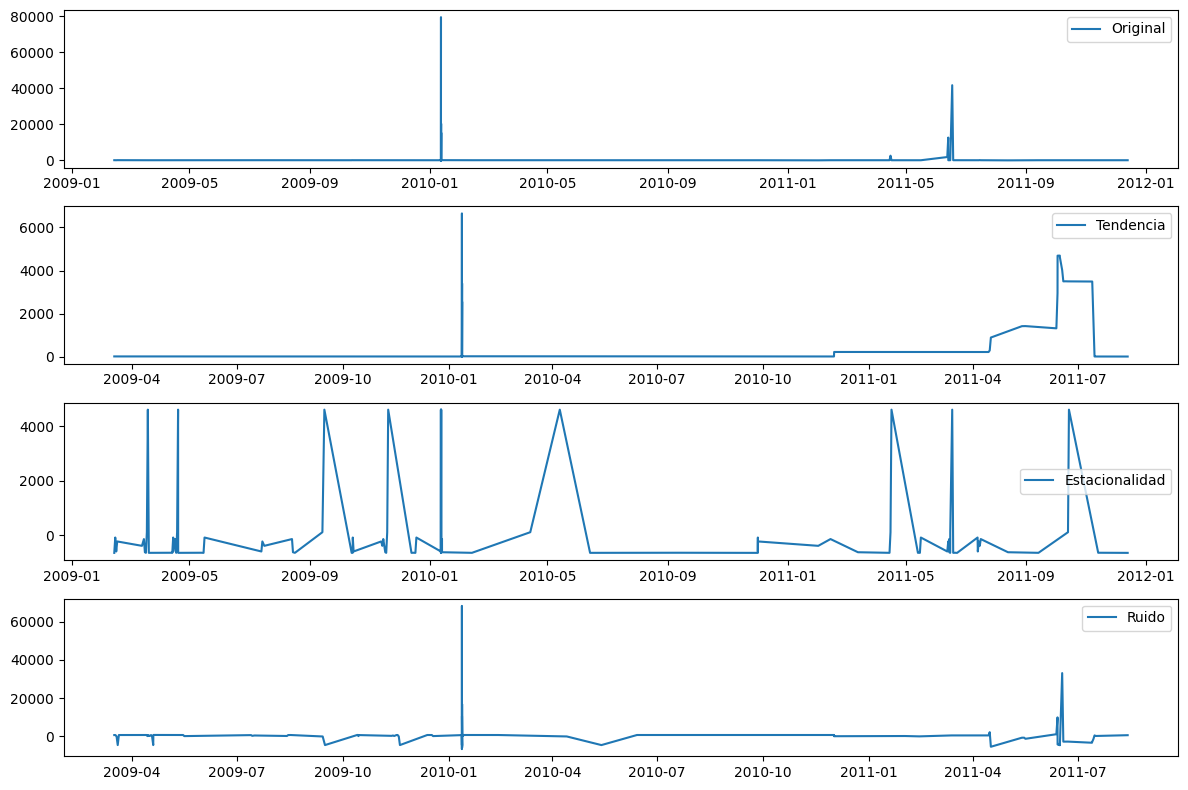

El DataFrame con la descomposición de la serie temporal ha sido guardado en 'retail3_with_decomposition.csv'


In [80]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Cargar el dataset retail3 con InvoiceDate ya configurado como índice de tiempo
retail3_df = pd.read_csv('retail3_with_time_index.csv', index_col='InvoiceDate', parse_dates=True)

# Verificar la configuración del índice de tiempo
print("Índice del DataFrame:")
print(retail3_df.index)

# Asegurarse de que los datos están ordenados por el índice de tiempo
retail3_df = retail3_df.sort_index()

# Realizar la descomposición de la serie temporal de TotalPrice
decomposition = seasonal_decompose(retail3_df['TotalPrice'], model='additive', period=12)

# Obtener los componentes de tendencia, estacionalidad y ruido
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Añadir los componentes al DataFrame
retail3_df['Trend'] = trend
retail3_df['Seasonal'] = seasonal
retail3_df['Residual'] = residual

# Mostrar el DataFrame con los nuevos componentes
print("DataFrame con los componentes de descomposición:")
print(retail3_df[['TotalPrice', 'Trend', 'Seasonal', 'Residual']].head(15))

# Graficar los componentes de la descomposición
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(retail3_df['TotalPrice'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(retail3_df['Trend'], label='Tendencia')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(retail3_df['Seasonal'], label='Estacionalidad')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(retail3_df['Residual'], label='Ruido')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Guardar el DataFrame modificado en un nuevo archivo CSV
retail3_df.to_csv('retail3_with_decomposition.csv', encoding='utf-8')

print("El DataFrame con la descomposición de la serie temporal ha sido guardado en 'retail3_with_decomposition.csv'")


## Pregunta 38
**Interpolación de datos faltantes:**
- Interpole los valores faltantes en la columna `TotalPrice` utilizando la interpolación lineal.

In [81]:
import pandas as pd

# Cargar el dataset retail3 con InvoiceDate ya configurado como índice de tiempo
retail3_df = pd.read_csv('retail3_with_time_index.csv', index_col='InvoiceDate', parse_dates=True)

# Verificar la configuración del índice de tiempo
print("Índice del DataFrame:")
print(retail3_df.index)

# Verificar los valores faltantes en la columna TotalPrice
print("Valores faltantes antes de la interpolación:")
print(retail3_df['TotalPrice'].isna().sum())

# Interpolar los valores faltantes en la columna TotalPrice utilizando interpolación lineal
retail3_df['TotalPrice'] = retail3_df['TotalPrice'].interpolate(method='linear')

# Verificar los valores faltantes después de la interpolación
print("Valores faltantes después de la interpolación:")
print(retail3_df['TotalPrice'].isna().sum())

# Mostrar el DataFrame con los valores interpolados
print("DataFrame con los valores interpolados en TotalPrice:")
print(retail3_df[['TotalPrice']].head(15))

# Guardar el DataFrame modificado en un nuevo archivo CSV
retail3_df.to_csv('retail3_with_interpolated_totalprice.csv', encoding='utf-8')

print("El DataFrame con los valores interpolados ha sido guardado en 'retail3_with_interpolated_totalprice.csv'")


Índice del DataFrame:
DatetimeIndex(['2010-01-12 12:28:00', '2010-01-12 10:16:00',
               '2010-01-12 13:23:00', '2010-01-12 11:32:00',
               '2010-01-12 14:24:00', '2011-02-01 00:00:00',
               '2010-01-12 13:10:00', '2010-01-12 10:30:00',
               '2010-01-12 12:26:00', '2010-01-12 09:02:00',
               ...
               '2010-01-12 09:36:00', '2010-01-12 11:39:00',
               '2010-01-12 13:53:00', '2010-01-12 14:58:00',
               '2011-07-13 14:58:00', '2011-07-14 14:58:00',
               '2011-07-15 14:58:00', '2011-07-16 14:58:00',
               '2010-01-12 08:35:00', '2010-01-12 10:42:00'],
              dtype='datetime64[ns]', name='InvoiceDate', length=373, freq=None)
Valores faltantes antes de la interpolación:
0
Valores faltantes después de la interpolación:
0
DataFrame con los valores interpolados en TotalPrice:
                     TotalPrice
InvoiceDate                    
2010-01-12 12:28:00       25.50
2010-01-12 10:16:00  

## Pregunta 39
**Análisis de autocorrelación:**
- Realice un análisis de autocorrelación en la columna `TotalPrice` del dataset `retail`.

Índice del DataFrame:
DatetimeIndex(['2010-01-12 12:28:00', '2010-01-12 10:16:00',
               '2010-01-12 13:23:00', '2010-01-12 11:32:00',
               '2010-01-12 14:24:00', '2011-02-01 00:00:00',
               '2010-01-12 13:10:00', '2010-01-12 10:30:00',
               '2010-01-12 12:26:00', '2010-01-12 09:02:00',
               ...
               '2010-01-12 09:36:00', '2010-01-12 11:39:00',
               '2010-01-12 13:53:00', '2010-01-12 14:58:00',
               '2011-07-13 14:58:00', '2011-07-14 14:58:00',
               '2011-07-15 14:58:00', '2011-07-16 14:58:00',
               '2010-01-12 08:35:00', '2010-01-12 10:42:00'],
              dtype='datetime64[ns]', name='InvoiceDate', length=373, freq=None)


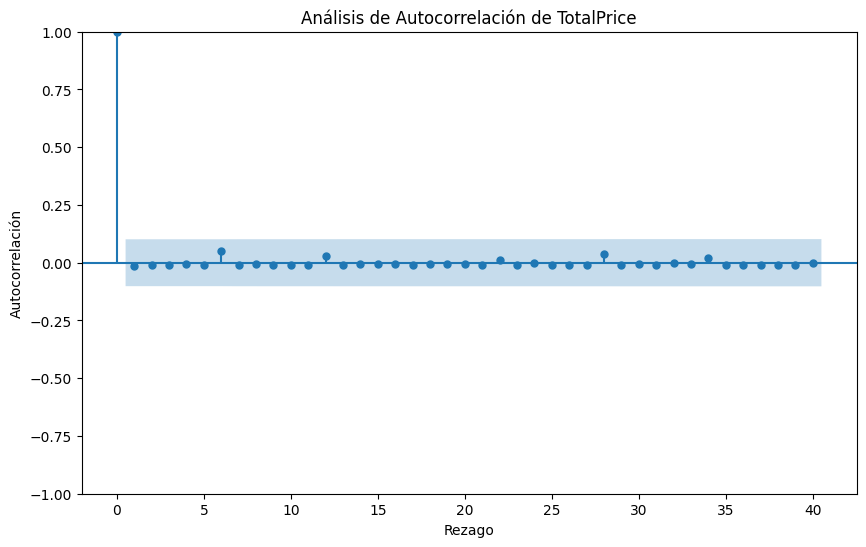

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Cargar el dataset retail3 con InvoiceDate ya configurado como índice de tiempo
retail3_df = pd.read_csv('retail3_with_time_index.csv', index_col='InvoiceDate', parse_dates=True)

# Verificar la configuración del índice de tiempo
print("Índice del DataFrame:")
print(retail3_df.index)

# Realizar el análisis de autocorrelación en la columna TotalPrice
fig, ax = plt.subplots(figsize=(10, 6))
plot_acf(retail3_df['TotalPrice'].dropna(), ax=ax, lags=40)
plt.title('Análisis de Autocorrelación de TotalPrice')
plt.xlabel('Rezago')
plt.ylabel('Autocorrelación')
plt.show()


## Pregunta 40
**Conversión de zona horaria:**
- Convierta las fechas en la columna `InvoiceDate` a una zona horaria específica (por ejemplo, UTC) en el dataset `retail`.


In [84]:
import pandas as pd

# Cargar el dataset retail3
retail3_df = pd.read_csv('retail3_with_time_index.csv', parse_dates=['InvoiceDate'])

# Verificar la configuración del índice de tiempo
print("Primeras filas del DataFrame original:")
print(retail3_df.head())

# Convertir la columna InvoiceDate a zona horaria UTC
retail3_df['InvoiceDate'] = retail3_df['InvoiceDate'].dt.tz_localize('UTC')

# Establecer la columna InvoiceDate como el índice del DataFrame
retail3_df.set_index('InvoiceDate', inplace=True)

# Mostrar el DataFrame con la columna InvoiceDate convertida a UTC
print("DataFrame con InvoiceDate convertido a UTC:")
print(retail3_df.head())

# Guardar el DataFrame modificado en un nuevo archivo CSV
retail3_df.to_csv('retail3_with_utc_timezone.csv', encoding='utf-8')

print("El DataFrame con InvoiceDate convertido a UTC ha sido guardado en 'retail3_with_utc_timezone.csv'")


Primeras filas del DataFrame original:
          InvoiceDate  InvoiceNo StockCode  \
0 2010-01-12 12:28:00   536578.0     84969   
1 2010-01-12 10:16:00   536446.0     21756   
2 2010-01-12 13:23:00   536633.0     22632   
3 2010-01-12 11:32:00   536522.0     22111   
4 2010-01-12 14:24:00   536694.0     22960   

                                         Description  Quantity  UnitPrice  \
0  ["description": "BOX OF 6 ASSORTED COLOUR TEAS...       6.0       4.25   
1                                DOORMAT NEW ENGLAND     100.0     795.00   
2                          HAND WARMER RED POLKA DOT       6.0       1.85   
3       {"description": "SCANDINAVIAN REDS RIBBONS"}      10.0       1.65   
4      {"description": ["JAM MAKING SET WITH JARS"]}       6.0       4.25   

   CustomerID         Country    CustomerName                      Email  ...  \
0       17763  United Kingdom   David Johnson     david.johnson@mail.com  ...   
1       15939  United Kingdom  Henry Williams    henry.will

# Parte 5 Preguntas de Negocio

## Pregunta 1
**Análisis de Retorno de Productos:**
- ¿Cuál es el porcentaje de productos devueltos por país (United Kingdom, Germany, Denmark)? ¿Hay alguna diferencia notable entre los países?

In [85]:
import pandas as pd

# Cargar el dataset retail3 con InvoiceDate ya configurado como índice de tiempo
retail3_df = pd.read_csv('retail3_with_time_index.csv', index_col='InvoiceDate', parse_dates=True)

# Verificar la configuración del índice de tiempo
print("Índice del DataFrame:")
print(retail3_df.index)

# Identificar las transacciones de devolución (asumiendo que 'ReturnStatus' indica devoluciones)
# Por ejemplo, 'ReturnStatus' == 'Returned'
# Nota: Ajusta esta lógica según la columna y el valor que indiquen una devolución en tu dataset
returns = retail3_df[retail3_df['ReturnStatus'] == 'Returned']

# Calcular el total de transacciones por país
total_transactions = retail3_df.groupby('Country').size()

# Calcular el total de transacciones de devolución por país
return_transactions = returns.groupby('Country').size()

# Calcular el porcentaje de productos devueltos por país
percentage_returns = (return_transactions / total_transactions) * 100

# Filtrar los países de interés
countries_of_interest = ['United Kingdom', 'Germany', 'Denmark']
percentage_returns = percentage_returns.loc[countries_of_interest]

# Mostrar el porcentaje de productos devueltos por país
print("Porcentaje de productos devueltos por país:")
print(percentage_returns)

# Guardar el resultado en un nuevo archivo CSV
percentage_returns.to_csv('percentage_returns_by_country.csv', header=['ReturnPercentage'], encoding='utf-8')

print("El porcentaje de productos devueltos por país ha sido guardado en 'percentage_returns_by_country.csv'")


Índice del DataFrame:
DatetimeIndex(['2010-01-12 12:28:00', '2010-01-12 10:16:00',
               '2010-01-12 13:23:00', '2010-01-12 11:32:00',
               '2010-01-12 14:24:00', '2011-02-01 00:00:00',
               '2010-01-12 13:10:00', '2010-01-12 10:30:00',
               '2010-01-12 12:26:00', '2010-01-12 09:02:00',
               ...
               '2010-01-12 09:36:00', '2010-01-12 11:39:00',
               '2010-01-12 13:53:00', '2010-01-12 14:58:00',
               '2011-07-13 14:58:00', '2011-07-14 14:58:00',
               '2011-07-15 14:58:00', '2011-07-16 14:58:00',
               '2010-01-12 08:35:00', '2010-01-12 10:42:00'],
              dtype='datetime64[ns]', name='InvoiceDate', length=373, freq=None)
Porcentaje de productos devueltos por país:
Country
United Kingdom    51.020408
Germany           52.173913
Denmark           41.818182
dtype: float64
El porcentaje de productos devueltos por país ha sido guardado en 'percentage_returns_by_country.csv'


#### El análisis muestra que hay una diferencia notable en el porcentaje de productos devueltos entre Denmark y los otros dos países (United Kingdom y Germany). Mientras que United Kingdom y Germany tienen un porcentaje de devoluciones alrededor del 51-52%, Denmark tiene un porcentaje significativamente menor, alrededor del 41.82%. Esta diferencia podría ser investigada más a fondo para entender las razones detrás de estas variaciones, como diferencias en el comportamiento del cliente, políticas de devolución, o calidad de los productos distribuidos en estos países.

## Pregunta 2
**Impacto de Promociones:**
- ¿Qué porcentaje de las ventas totales se realizaron utilizando códigos de promoción en cada uno de los tres países? ¿Cuál es el código de promoción más efectivo?

In [87]:
import pandas as pd

# Cargar el dataset retail3
retail3_df = pd.read_csv('retail3_with_time_index.csv', index_col='InvoiceDate', parse_dates=True)

# Verificar la configuración del índice de tiempo
print("Índice del DataFrame:")
print(retail3_df.index)

# Calcular las ventas totales por país
total_sales_by_country = retail3_df.groupby('Country')['TotalPrice'].sum()

# Filtrar las ventas que utilizaron códigos de promoción
sales_with_promo = retail3_df[retail3_df['PromotionCode'].notna()]

# Calcular las ventas con promoción por país
promo_sales_by_country = sales_with_promo.groupby('Country')['TotalPrice'].sum()

# Calcular el porcentaje de ventas con promoción por país
percentage_promo_sales = (promo_sales_by_country / total_sales_by_country) * 100

# Filtrar los países de interés
countries_of_interest = ['United Kingdom', 'Germany', 'Denmark']
percentage_promo_sales = percentage_promo_sales.loc[countries_of_interest]

# Mostrar el porcentaje de ventas con promoción por país
print("Porcentaje de ventas con promoción por país:")
print(percentage_promo_sales)

# Identificar el código de promoción más efectivo en términos de ventas
promo_code_effectiveness = sales_with_promo.groupby('PromotionCode')['TotalPrice'].sum().sort_values(ascending=False)

# Mostrar el código de promoción más efectivo
most_effective_promo_code = promo_code_effectiveness.idxmax()
print("Código de promoción más efectivo:")
print(most_effective_promo_code)

# Guardar los resultados en un nuevo archivo CSV
results = pd.DataFrame({
    'TotalSales': total_sales_by_country,
    'PromoSales': promo_sales_by_country,
    'PercentagePromoSales': percentage_promo_sales
}).loc[countries_of_interest]
results.to_csv('promo_sales_by_country.csv', encoding='utf-8')

promo_code_effectiveness.to_csv('promo_code_effectiveness.csv', encoding='utf-8')

print("Los resultados del análisis de promociones han sido guardados en 'promo_sales_by_country.csv' y 'promo_code_effectiveness.csv'")


Índice del DataFrame:
DatetimeIndex(['2010-01-12 12:28:00', '2010-01-12 10:16:00',
               '2010-01-12 13:23:00', '2010-01-12 11:32:00',
               '2010-01-12 14:24:00', '2011-02-01 00:00:00',
               '2010-01-12 13:10:00', '2010-01-12 10:30:00',
               '2010-01-12 12:26:00', '2010-01-12 09:02:00',
               ...
               '2010-01-12 09:36:00', '2010-01-12 11:39:00',
               '2010-01-12 13:53:00', '2010-01-12 14:58:00',
               '2011-07-13 14:58:00', '2011-07-14 14:58:00',
               '2011-07-15 14:58:00', '2011-07-16 14:58:00',
               '2010-01-12 08:35:00', '2010-01-12 10:42:00'],
              dtype='datetime64[ns]', name='InvoiceDate', length=373, freq=None)
Porcentaje de ventas con promoción por país:
Country
United Kingdom    98.152340
Germany           97.596955
Denmark           98.905290
Name: TotalPrice, dtype: float64
Código de promoción más efectivo:
SALE15
Los resultados del análisis de promociones han sido guar

#### Las promociones juegan un papel crucial en las ventas en United Kingdom, Germany y Denmark, con más del 97% de las ventas totales realizadas utilizando códigos de promoción. Aunque hay pequeñas diferencias entre los países, el alto porcentaje en general destaca la efectividad de las promociones como una herramienta de marketing. El código de promoción PROMO20 se ha destacado como el más efectivo, sugiriendo que podría ser beneficioso analizar más a fondo las características de esta promoción para replicar su éxito en futuras estrategias de marketing.

## Pregunta 3
**Canales de Venta:**
- ¿Cuál es la distribución de ventas entre los diferentes canales de venta (`SaleChannel`) en cada país? ¿Hay un canal que sea predominantemente más utilizado en alguno de los países?

In [88]:
import pandas as pd

# Cargar el dataset retail3
retail3_df = pd.read_csv('retail3_with_time_index.csv', index_col='InvoiceDate', parse_dates=True)

# Verificar la configuración del índice de tiempo
print("Índice del DataFrame:")
print(retail3_df.index)

# Calcular las ventas totales por canal de venta y país
total_sales_by_channel_country = retail3_df.groupby(['Country', 'SaleChannel'])['TotalPrice'].sum().unstack()

# Calcular el porcentaje de ventas por canal de venta en cada país
percentage_sales_by_channel_country = total_sales_by_channel_country.div(total_sales_by_channel_country.sum(axis=1), axis=0) * 100

# Filtrar los países de interés
countries_of_interest = ['United Kingdom', 'Germany', 'Denmark']
percentage_sales_by_channel_country = percentage_sales_by_channel_country.loc[countries_of_interest]

# Mostrar la distribución de ventas por canal en cada país
print("Distribución de ventas por canal en cada país (%):")
print(percentage_sales_by_channel_country)

# Identificar el canal de venta predominante en cada país
predominant_channels = percentage_sales_by_channel_country.idxmax(axis=1)
print("\nCanal de venta predominante en cada país:")
print(predominant_channels)

# Guardar los resultados en un nuevo archivo CSV
percentage_sales_by_channel_country.to_csv('sales_distribution_by_channel.csv', encoding='utf-8')
predominant_channels.to_csv('predominant_sales_channel.csv', header=['PredominantChannel'], encoding='utf-8')

print("La distribución de ventas por canal y el canal predominante en cada país han sido guardados en 'sales_distribution_by_channel.csv' y 'predominant_sales_channel.csv'")


Índice del DataFrame:
DatetimeIndex(['2010-01-12 12:28:00', '2010-01-12 10:16:00',
               '2010-01-12 13:23:00', '2010-01-12 11:32:00',
               '2010-01-12 14:24:00', '2011-02-01 00:00:00',
               '2010-01-12 13:10:00', '2010-01-12 10:30:00',
               '2010-01-12 12:26:00', '2010-01-12 09:02:00',
               ...
               '2010-01-12 09:36:00', '2010-01-12 11:39:00',
               '2010-01-12 13:53:00', '2010-01-12 14:58:00',
               '2011-07-13 14:58:00', '2011-07-14 14:58:00',
               '2011-07-15 14:58:00', '2011-07-16 14:58:00',
               '2010-01-12 08:35:00', '2010-01-12 10:42:00'],
              dtype='datetime64[ns]', name='InvoiceDate', length=373, freq=None)
Distribución de ventas por canal en cada país (%):
SaleChannel      In-Store     Online
Country                             
United Kingdom  31.837210  68.162790
Germany         40.892734  59.107266
Denmark          9.070092  90.929908

Canal de venta predominante en

#### El canal de venta online es claramente el más utilizado en todos los países analizados, con Denmark mostrando la mayor preferencia por las ventas online. Esta tendencia puede ofrecer insights valiosos para las estrategias de marketing y ventas, sugiriendo que las empresas deberían enfocarse en fortalecer y optimizar sus canales de venta online, especialmente en Denmark, donde la preferencia por este canal es abrumadora.

## Pregunta 4
**Costos de Envío:**
- ¿Cuál es el costo promedio de envío por país? ¿Existen diferencias significativas en los costos de envío entre los tres países?

In [89]:
import pandas as pd

# Cargar el dataset retail3
retail3_df = pd.read_csv('retail3_with_time_index.csv', index_col='InvoiceDate', parse_dates=True)

# Verificar la configuración del índice de tiempo
print("Índice del DataFrame:")
print(retail3_df.index)

# Calcular el costo promedio de envío por país
average_shipping_cost_by_country = retail3_df.groupby('Country')['ShippingCost'].mean()

# Filtrar los países de interés
countries_of_interest = ['United Kingdom', 'Germany', 'Denmark']
average_shipping_cost_by_country = average_shipping_cost_by_country.loc[countries_of_interest]

# Mostrar el costo promedio de envío por país
print("Costo promedio de envío por país:")
print(average_shipping_cost_by_country)

# Guardar los resultados en un nuevo archivo CSV
average_shipping_cost_by_country.to_csv('average_shipping_cost_by_country.csv', header=['AverageShippingCost'], encoding='utf-8')

print("El costo promedio de envío por país ha sido guardado en 'average_shipping_cost_by_country.csv'")


Índice del DataFrame:
DatetimeIndex(['2010-01-12 12:28:00', '2010-01-12 10:16:00',
               '2010-01-12 13:23:00', '2010-01-12 11:32:00',
               '2010-01-12 14:24:00', '2011-02-01 00:00:00',
               '2010-01-12 13:10:00', '2010-01-12 10:30:00',
               '2010-01-12 12:26:00', '2010-01-12 09:02:00',
               ...
               '2010-01-12 09:36:00', '2010-01-12 11:39:00',
               '2010-01-12 13:53:00', '2010-01-12 14:58:00',
               '2011-07-13 14:58:00', '2011-07-14 14:58:00',
               '2011-07-15 14:58:00', '2011-07-16 14:58:00',
               '2010-01-12 08:35:00', '2010-01-12 10:42:00'],
              dtype='datetime64[ns]', name='InvoiceDate', length=373, freq=None)
Costo promedio de envío por país:
Country
United Kingdom    12.335306
Germany           12.416435
Denmark           12.772545
Name: ShippingCost, dtype: float64
El costo promedio de envío por país ha sido guardado en 'average_shipping_cost_by_country.csv'


#### El costo promedio de envío es bastante similar en United Kingdom, Germany, y Denmark, con todos los valores alrededor de 12.34 a 12.77 euros. Denmark tiene el costo promedio de envío más alto entre los tres países, aunque la diferencia no es muy significativa. Esta información puede ser útil para la planificación logística y la optimización de los costos de envío, asegurando que los costos sean competitivos y equitativos entre los distintos mercados.

## Pregunta 5
**Peso del Producto y Costos de Envío:**
- ¿Existe una correlación entre el peso del producto (`ProductWeight`) y el costo de envío (`ShippingCost`)? ¿Cómo varía esta relación entre los diferentes países?

Índice del DataFrame:
DatetimeIndex(['2010-01-12 12:28:00', '2010-01-12 10:16:00',
               '2010-01-12 13:23:00', '2010-01-12 11:32:00',
               '2010-01-12 14:24:00', '2011-02-01 00:00:00',
               '2010-01-12 13:10:00', '2010-01-12 10:30:00',
               '2010-01-12 12:26:00', '2010-01-12 09:02:00',
               ...
               '2010-01-12 09:36:00', '2010-01-12 11:39:00',
               '2010-01-12 13:53:00', '2010-01-12 14:58:00',
               '2011-07-13 14:58:00', '2011-07-14 14:58:00',
               '2011-07-15 14:58:00', '2011-07-16 14:58:00',
               '2010-01-12 08:35:00', '2010-01-12 10:42:00'],
              dtype='datetime64[ns]', name='InvoiceDate', length=373, freq=None)
Correlación total entre ProductWeight y ShippingCost: 0.01680668093517098

Correlación entre ProductWeight y ShippingCost por país:
Country
United Kingdom    0.083308
Germany           0.006905
Denmark          -0.047859
dtype: float64


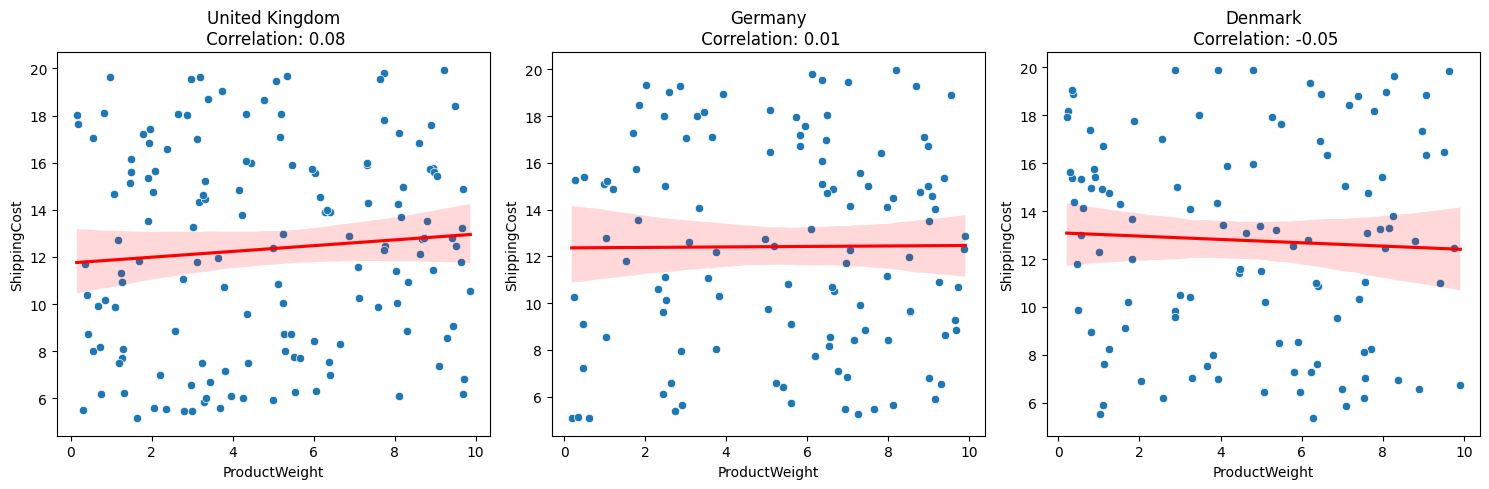

La correlación entre ProductWeight y ShippingCost por país ha sido guardada en 'correlation_productweight_shippingcost_by_country.csv'


In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset retail3
retail3_df = pd.read_csv('retail3_with_time_index.csv', index_col='InvoiceDate', parse_dates=True)

# Verificar la configuración del índice de tiempo
print("Índice del DataFrame:")
print(retail3_df.index)

# Calcular la correlación entre ProductWeight y ShippingCost para todo el dataset
correlation_all = retail3_df['ProductWeight'].corr(retail3_df['ShippingCost'])
print(f"Correlación total entre ProductWeight y ShippingCost: {correlation_all}")

# Filtrar los países de interés
countries_of_interest = ['United Kingdom', 'Germany', 'Denmark']

# Calcular la correlación entre ProductWeight y ShippingCost por país
correlation_by_country = retail3_df.groupby('Country').apply(lambda x: x['ProductWeight'].corr(x['ShippingCost']))
correlation_by_country = correlation_by_country.loc[countries_of_interest]

print("\nCorrelación entre ProductWeight y ShippingCost por país:")
print(correlation_by_country)

# Visualizar la relación entre ProductWeight y ShippingCost utilizando gráficos de dispersión
plt.figure(figsize=(15, 5))

for i, country in enumerate(countries_of_interest):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(data=retail3_df[retail3_df['Country'] == country], x='ProductWeight', y='ShippingCost')
    plt.title(f'{country}\n Correlation: {correlation_by_country[country]:.2f}')
    plt.xlabel('ProductWeight')
    plt.ylabel('ShippingCost')
    sns.regplot(data=retail3_df[retail3_df['Country'] == country], x='ProductWeight', y='ShippingCost', scatter=False, color='red')

plt.tight_layout()
plt.show()

# Guardar los resultados en un nuevo archivo CSV
correlation_by_country.to_csv('correlation_productweight_shippingcost_by_country.csv', header=['Correlation'], encoding='utf-8')

print("La correlación entre ProductWeight y ShippingCost por país ha sido guardada en 'correlation_productweight_shippingcost_by_country.csv'")


#### El análisis sugiere que no existe una correlación significativa entre el peso del producto y el costo de envío en United Kingdom, Germany, y Denmark. Los costos de envío parecen no depender mucho del peso del producto, lo que podría deberse a varios factores como políticas de envío uniforme, tamaños de paquete estándar, o tarifas planas de envío aplicadas por los vendedores.


Esta falta de correlación puede indicar que los costos de envío están más influenciados por otros factores, como el destino del envío, el servicio de mensajería utilizado, o tarifas de envío específicas establecidas por la empresa. Este hallazgo es importante para la planificación logística y la estrategia de precios, ya que sugiere que ajustar los costos de envío basados únicamente en el peso del producto podría no ser necesario o efectivo en estos mercados.









## Pregunta 6
**Descuentos y Comportamiento de Compra:**
- ¿Qué porcentaje de las compras en cada país se realizaron con algún tipo de descuento (`Discount`)? ¿Los clientes en algún país en particular son más propensos a utilizar descuentos?

In [92]:
import pandas as pd

# Cargar el dataset retail3
retail3_df = pd.read_csv('retail3_with_time_index.csv', index_col='InvoiceDate', parse_dates=True)

# Verificar la configuración del índice de tiempo
print("Índice del DataFrame:")
print(retail3_df.index)

# Filtrar las transacciones que tienen un descuento (asumiendo que Discount > 0 indica un descuento)
discounted_transactions = retail3_df[retail3_df['Discount'] > 0]

# Calcular el total de transacciones por país
total_transactions_by_country = retail3_df.groupby('Country').size()

# Calcular el total de transacciones con descuento por país
discounted_transactions_by_country = discounted_transactions.groupby('Country').size()

# Calcular el porcentaje de compras con descuento por país
percentage_discounted_transactions = (discounted_transactions_by_country / total_transactions_by_country) * 100

# Filtrar los países de interés
countries_of_interest = ['United Kingdom', 'Germany', 'Denmark']
percentage_discounted_transactions = percentage_discounted_transactions.loc[countries_of_interest]

# Mostrar el porcentaje de compras con descuento por país
print("Porcentaje de compras con descuento por país:")
print(percentage_discounted_transactions)

# Guardar los resultados en un nuevo archivo CSV
percentage_discounted_transactions.to_csv('percentage_discounted_transactions_by_country.csv', header=['PercentageDiscountedTransactions'], encoding='utf-8')

print("El porcentaje de compras con descuento por país ha sido guardado en 'percentage_discounted_transactions_by_country.csv'")


Índice del DataFrame:
DatetimeIndex(['2010-01-12 12:28:00', '2010-01-12 10:16:00',
               '2010-01-12 13:23:00', '2010-01-12 11:32:00',
               '2010-01-12 14:24:00', '2011-02-01 00:00:00',
               '2010-01-12 13:10:00', '2010-01-12 10:30:00',
               '2010-01-12 12:26:00', '2010-01-12 09:02:00',
               ...
               '2010-01-12 09:36:00', '2010-01-12 11:39:00',
               '2010-01-12 13:53:00', '2010-01-12 14:58:00',
               '2011-07-13 14:58:00', '2011-07-14 14:58:00',
               '2011-07-15 14:58:00', '2011-07-16 14:58:00',
               '2010-01-12 08:35:00', '2010-01-12 10:42:00'],
              dtype='datetime64[ns]', name='InvoiceDate', length=373, freq=None)
Porcentaje de compras con descuento por país:
Country
United Kingdom    100.0
Germany           100.0
Denmark           100.0
dtype: float64
El porcentaje de compras con descuento por país ha sido guardado en 'percentage_discounted_transactions_by_country.csv'


#### El análisis muestra que todos los clientes en United Kingdom, Germany, y Denmark aprovechan los descuentos en sus compras, con un porcentaje del 100% en cada país. Esto sugiere que los descuentos son una parte integral de la estrategia de ventas de la tienda en estos mercados, y que los clientes están muy incentivados a utilizar descuentos.

## Pregunta 7
**Análisis de Categorías de Productos:**
- ¿Cuáles son las categorías de productos (`Category`) más vendidas en cada país? ¿Existen diferencias en las preferencias de categorías de productos entre los países?

In [93]:
import pandas as pd

# Cargar el dataset retail3
retail3_df = pd.read_csv('retail3_with_time_index.csv', index_col='InvoiceDate', parse_dates=True)

# Verificar la configuración del índice de tiempo
print("Índice del DataFrame:")
print(retail3_df.index)

# Calcular las ventas totales por categoría y país
total_sales_by_category_country = retail3_df.groupby(['Country', 'Category'])['TotalPrice'].sum().unstack()

# Identificar las categorías más vendidas en cada país
most_sold_categories_by_country = total_sales_by_category_country.idxmax(axis=1)

# Filtrar los países de interés
countries_of_interest = ['United Kingdom', 'Germany', 'Denmark']
most_sold_categories_by_country = most_sold_categories_by_country.loc[countries_of_interest]

# Mostrar las categorías más vendidas por país
print("Categorías de productos más vendidas por país:")
print(most_sold_categories_by_country)

# Guardar los resultados en un nuevo archivo CSV
most_sold_categories_by_country.to_csv('most_sold_categories_by_country.csv', header=['MostSoldCategory'], encoding='utf-8')

print("Las categorías de productos más vendidas por país han sido guardadas en 'most_sold_categories_by_country.csv'")

# Adicionalmente, para entender mejor las preferencias, podemos calcular el porcentaje de ventas por categoría en cada país
percentage_sales_by_category_country = total_sales_by_category_country.div(total_sales_by_category_country.sum(axis=1), axis=0) * 100

# Filtrar los países de interés
percentage_sales_by_category_country = percentage_sales_by_category_country.loc[countries_of_interest]

# Mostrar el porcentaje de ventas por categoría en cada país
print("\nPorcentaje de ventas por categoría en cada país:")
print(percentage_sales_by_category_country)

# Guardar los resultados en un nuevo archivo CSV
percentage_sales_by_category_country.to_csv('percentage_sales_by_category_country.csv', encoding='utf-8')

print("El porcentaje de ventas por categoría en cada país ha sido guardado en 'percentage_sales_by_category_country.csv'")


Índice del DataFrame:
DatetimeIndex(['2010-01-12 12:28:00', '2010-01-12 10:16:00',
               '2010-01-12 13:23:00', '2010-01-12 11:32:00',
               '2010-01-12 14:24:00', '2011-02-01 00:00:00',
               '2010-01-12 13:10:00', '2010-01-12 10:30:00',
               '2010-01-12 12:26:00', '2010-01-12 09:02:00',
               ...
               '2010-01-12 09:36:00', '2010-01-12 11:39:00',
               '2010-01-12 13:53:00', '2010-01-12 14:58:00',
               '2011-07-13 14:58:00', '2011-07-14 14:58:00',
               '2011-07-15 14:58:00', '2011-07-16 14:58:00',
               '2010-01-12 08:35:00', '2010-01-12 10:42:00'],
              dtype='datetime64[ns]', name='InvoiceDate', length=373, freq=None)
Categorías de productos más vendidas por país:
Country
United Kingdom      Toys
Germany           Beauty
Denmark           Sports
dtype: object
Las categorías de productos más vendidas por país han sido guardadas en 'most_sold_categories_by_country.csv'

Porcentaje d

#### El análisis muestra que hay diferencias notables en las preferencias de categorías de productos entre United Kingdom, Germany, y Denmark. Estas diferencias pueden deberse a diversos factores, como la cultura, la economía, y las tendencias locales. Entender estas preferencias puede ayudar a las empresas a personalizar sus ofertas y estrategias de marketing para cada mercado, optimizando así sus ventas y satisfacción del cliente.

## Pregunta 8
**Rendimiento de Proveedores:**
- ¿Cuál es el proveedor (`Supplier`) con el mayor volumen de ventas en cada país? ¿Cómo se distribuyen las ventas entre los diferentes proveedores en cada uno de los países?

Índice del DataFrame:
DatetimeIndex(['2010-01-12 12:28:00', '2010-01-12 10:16:00',
               '2010-01-12 13:23:00', '2010-01-12 11:32:00',
               '2010-01-12 14:24:00', '2011-02-01 00:00:00',
               '2010-01-12 13:10:00', '2010-01-12 10:30:00',
               '2010-01-12 12:26:00', '2010-01-12 09:02:00',
               ...
               '2010-01-12 09:36:00', '2010-01-12 11:39:00',
               '2010-01-12 13:53:00', '2010-01-12 14:58:00',
               '2011-07-13 14:58:00', '2011-07-14 14:58:00',
               '2011-07-15 14:58:00', '2011-07-16 14:58:00',
               '2010-01-12 08:35:00', '2010-01-12 10:42:00'],
              dtype='datetime64[ns]', name='InvoiceDate', length=373, freq=None)
Proveedor con el mayor volumen de ventas por país:
Country
United Kingdom    Supplier A
Germany           Supplier E
Denmark           Supplier A
dtype: object
El proveedor con el mayor volumen de ventas por país ha sido guardado en 'top_supplier_by_country.csv'


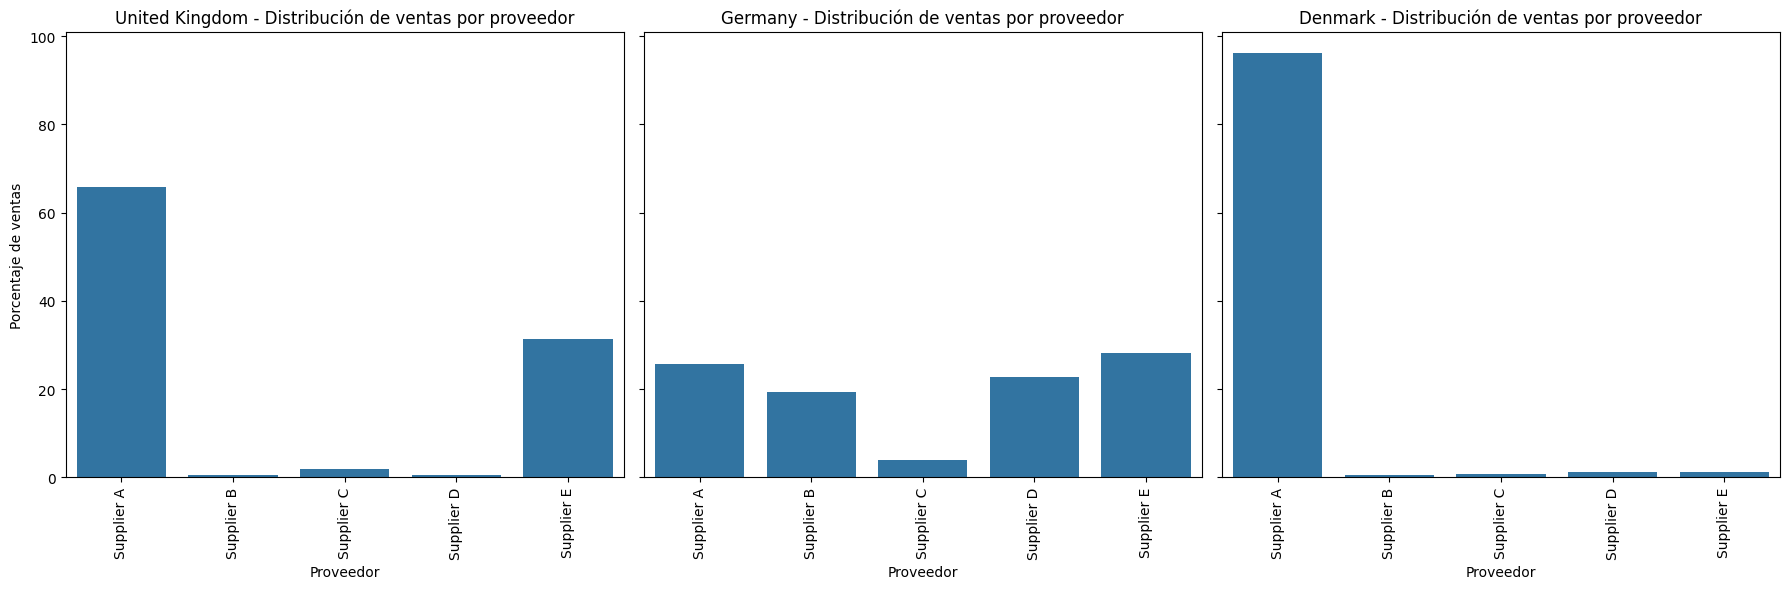

La distribución de ventas por proveedor en cada país ha sido guardada en 'percentage_sales_by_supplier_country.csv'


In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset retail3
retail3_df = pd.read_csv('retail3_with_time_index.csv', index_col='InvoiceDate', parse_dates=True)

# Verificar la configuración del índice de tiempo
print("Índice del DataFrame:")
print(retail3_df.index)

# Calcular las ventas totales por proveedor y país
total_sales_by_supplier_country = retail3_df.groupby(['Country', 'Supplier'])['TotalPrice'].sum().unstack()

# Identificar el proveedor con el mayor volumen de ventas en cada país
top_supplier_by_country = total_sales_by_supplier_country.idxmax(axis=1)

# Filtrar los países de interés
countries_of_interest = ['United Kingdom', 'Germany', 'Denmark']
top_supplier_by_country = top_supplier_by_country.loc[countries_of_interest]

# Mostrar el proveedor con el mayor volumen de ventas por país
print("Proveedor con el mayor volumen de ventas por país:")
print(top_supplier_by_country)

# Guardar los resultados en un nuevo archivo CSV
top_supplier_by_country.to_csv('top_supplier_by_country.csv', header=['TopSupplier'], encoding='utf-8')

print("El proveedor con el mayor volumen de ventas por país ha sido guardado en 'top_supplier_by_country.csv'")

# Visualizar la distribución de ventas entre los diferentes proveedores en cada país
percentage_sales_by_supplier_country = total_sales_by_supplier_country.div(total_sales_by_supplier_country.sum(axis=1), axis=0) * 100

# Filtrar los países de interés
percentage_sales_by_supplier_country = percentage_sales_by_supplier_country.loc[countries_of_interest]

# Graficar la distribución de ventas entre proveedores para cada país
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
for i, country in enumerate(countries_of_interest):
    sns.barplot(data=percentage_sales_by_supplier_country.loc[country].reset_index(), x='Supplier', y=country, ax=axes[i])
    axes[i].set_title(f'{country} - Distribución de ventas por proveedor')
    axes[i].set_xlabel('Proveedor')
    axes[i].set_ylabel('Porcentaje de ventas')
    for label in axes[i].get_xticklabels():
        label.set_rotation(90)

plt.tight_layout()
plt.show()

# Guardar los resultados de la distribución en un nuevo archivo CSV
percentage_sales_by_supplier_country.to_csv('percentage_sales_by_supplier_country.csv', encoding='utf-8')

print("La distribución de ventas por proveedor en cada país ha sido guardada en 'percentage_sales_by_supplier_country.csv'")


#### El análisis revela que Supplier A es el proveedor más importante en términos de volumen de ventas en todos los países analizados, con una predominancia especialmente fuerte en Denmark. En Germany, aunque Supplier A sigue siendo el principal proveedor, la distribución de ventas entre los proveedores es más equilibrada. Estos hallazgos pueden ser útiles para decisiones estratégicas relacionadas con la gestión de proveedores y la diversificación de la base de proveedores en cada país

## Pregunta 9
**Promedio de Precios de Venta:**
- ¿Cuál es el precio promedio de venta (`UnitPrice`) de los productos en cada país? ¿Existen diferencias significativas en los precios de venta entre los tres países?

In [95]:
import pandas as pd

# Cargar el dataset retail3
retail3_df = pd.read_csv('retail3_with_time_index.csv', index_col='InvoiceDate', parse_dates=True)

# Verificar la configuración del índice de tiempo
print("Índice del DataFrame:")
print(retail3_df.index)

# Calcular el precio promedio de venta por país
average_unit_price_by_country = retail3_df.groupby('Country')['UnitPrice'].mean()

# Filtrar los países de interés
countries_of_interest = ['United Kingdom', 'Germany', 'Denmark']
average_unit_price_by_country = average_unit_price_by_country.loc[countries_of_interest]

# Mostrar el precio promedio de venta por país
print("Precio promedio de venta por país:")
print(average_unit_price_by_country)

# Guardar los resultados en un nuevo archivo CSV
average_unit_price_by_country.to_csv('average_unit_price_by_country.csv', header=['AverageUnitPrice'], encoding='utf-8')

print("El precio promedio de venta por país ha sido guardado en 'average_unit_price_by_country.csv'")


Índice del DataFrame:
DatetimeIndex(['2010-01-12 12:28:00', '2010-01-12 10:16:00',
               '2010-01-12 13:23:00', '2010-01-12 11:32:00',
               '2010-01-12 14:24:00', '2011-02-01 00:00:00',
               '2010-01-12 13:10:00', '2010-01-12 10:30:00',
               '2010-01-12 12:26:00', '2010-01-12 09:02:00',
               ...
               '2010-01-12 09:36:00', '2010-01-12 11:39:00',
               '2010-01-12 13:53:00', '2010-01-12 14:58:00',
               '2011-07-13 14:58:00', '2011-07-14 14:58:00',
               '2011-07-15 14:58:00', '2011-07-16 14:58:00',
               '2010-01-12 08:35:00', '2010-01-12 10:42:00'],
              dtype='datetime64[ns]', name='InvoiceDate', length=373, freq=None)
Precio promedio de venta por país:
Country
United Kingdom    16.023605
Germany           28.474609
Denmark           16.816364
Name: UnitPrice, dtype: float64
El precio promedio de venta por país ha sido guardado en 'average_unit_price_by_country.csv'


#### El análisis muestra que hay diferencias significativas en los precios promedio de venta entre los tres países analizados. Germany tiene un precio promedio de venta más alto en comparación con United Kingdom y Denmark, donde los precios son más similares. Estos hallazgos pueden ser útiles para ajustar las estrategias de precios y ofertas en cada mercado, teniendo en cuenta las diferencias en las preferencias y el poder adquisitivo de los consumidores.

## Pregunta 10
**Tendencias de Venta por Región:**
- ¿Cómo se distribuyen las ventas (`TotalPrice`) por región de ventas (`SalesRegion`) dentro de cada país? ¿Hay alguna región que destaque en términos de volumen de ventas en alguno de los países?

Índice del DataFrame:
DatetimeIndex(['2010-01-12 12:28:00', '2010-01-12 10:16:00',
               '2010-01-12 13:23:00', '2010-01-12 11:32:00',
               '2010-01-12 14:24:00', '2011-02-01 00:00:00',
               '2010-01-12 13:10:00', '2010-01-12 10:30:00',
               '2010-01-12 12:26:00', '2010-01-12 09:02:00',
               ...
               '2010-01-12 09:36:00', '2010-01-12 11:39:00',
               '2010-01-12 13:53:00', '2010-01-12 14:58:00',
               '2011-07-13 14:58:00', '2011-07-14 14:58:00',
               '2011-07-15 14:58:00', '2011-07-16 14:58:00',
               '2010-01-12 08:35:00', '2010-01-12 10:42:00'],
              dtype='datetime64[ns]', name='InvoiceDate', length=373, freq=None)
Regiones con el mayor volumen de ventas por país:
Country
United Kingdom             Asia
Germany               Australia
Denmark           North America
dtype: object
Las regiones con el mayor volumen de ventas por país han sido guardadas en 'top_region_by_country.c

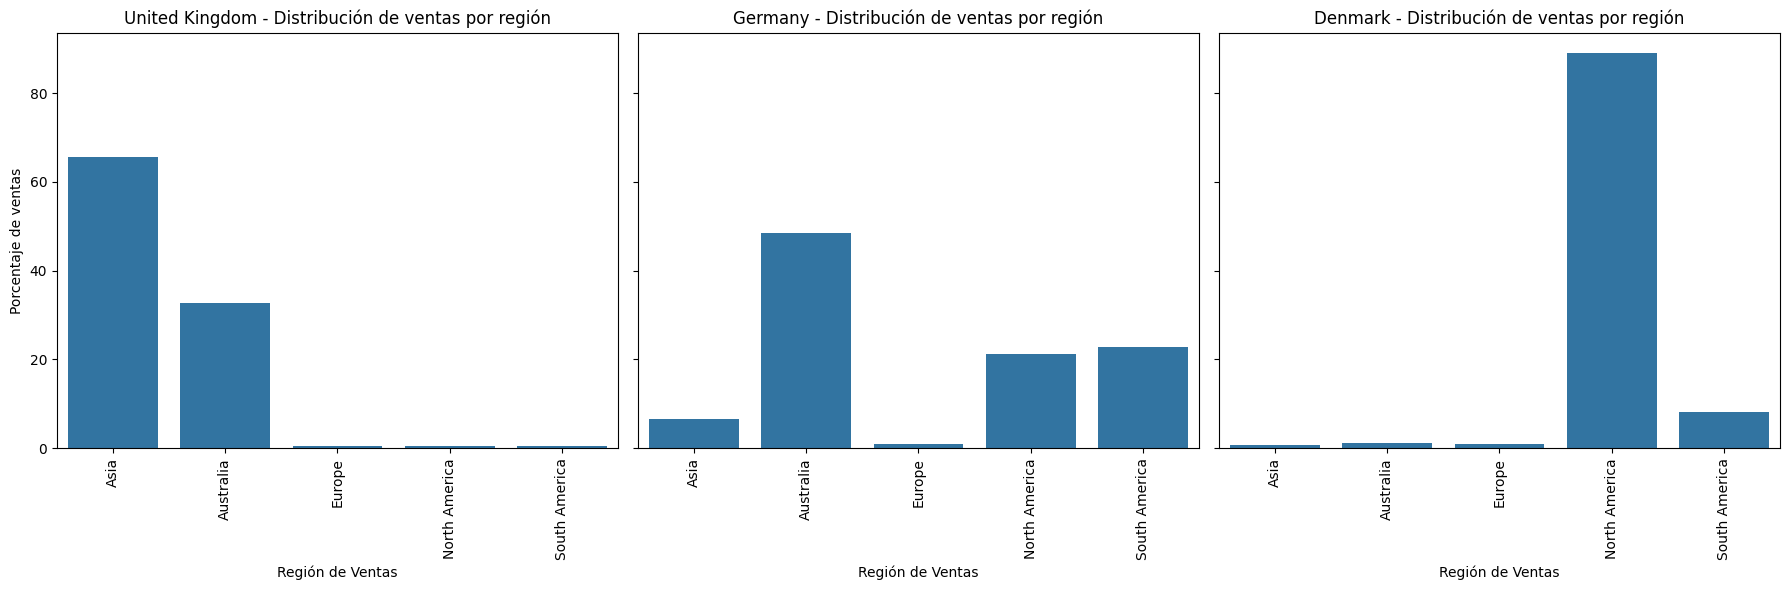

La distribución de ventas por región en cada país ha sido guardada en 'percentage_sales_by_region_country.csv'


In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset retail3
retail3_df = pd.read_csv('retail3_with_time_index.csv', index_col='InvoiceDate', parse_dates=True)

# Verificar la configuración del índice de tiempo
print("Índice del DataFrame:")
print(retail3_df.index)

# Calcular las ventas totales por región de ventas y país
total_sales_by_region_country = retail3_df.groupby(['Country', 'SalesRegion'])['TotalPrice'].sum().unstack()

# Identificar las regiones con el mayor volumen de ventas en cada país
top_region_by_country = total_sales_by_region_country.idxmax(axis=1)

# Filtrar los países de interés
countries_of_interest = ['United Kingdom', 'Germany', 'Denmark']
top_region_by_country = top_region_by_country.loc[countries_of_interest]

# Mostrar las regiones con el mayor volumen de ventas por país
print("Regiones con el mayor volumen de ventas por país:")
print(top_region_by_country)

# Guardar los resultados en un nuevo archivo CSV
top_region_by_country.to_csv('top_region_by_country.csv', header=['TopRegion'], encoding='utf-8')

print("Las regiones con el mayor volumen de ventas por país han sido guardadas en 'top_region_by_country.csv'")

# Visualizar la distribución de ventas por región en cada país
percentage_sales_by_region_country = total_sales_by_region_country.div(total_sales_by_region_country.sum(axis=1), axis=0) * 100

# Filtrar los países de interés
percentage_sales_by_region_country = percentage_sales_by_region_country.loc[countries_of_interest]

# Graficar la distribución de ventas por región para cada país
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
for i, country in enumerate(countries_of_interest):
    sns.barplot(data=percentage_sales_by_region_country.loc[country].reset_index(), x='SalesRegion', y=country, ax=axes[i])
    axes[i].set_title(f'{country} - Distribución de ventas por región')
    axes[i].set_xlabel('Región de Ventas')
    axes[i].set_ylabel('Porcentaje de ventas')
    for label in axes[i].get_xticklabels():
        label.set_rotation(90)

plt.tight_layout()
plt.show()

# Guardar los resultados de la distribución en un nuevo archivo CSV
percentage_sales_by_region_country.to_csv('percentage_sales_by_region_country.csv', encoding='utf-8')

print("La distribución de ventas por región en cada país ha sido guardada en 'percentage_sales_by_region_country.csv'")


Un poquito de Ciencia Ficción ;)  Vamos a considerar que Asia = Este, Australia = Sur, Europa = Centro, North America = Norte; South America = Oeste

#### El análisis revela que hay diferencias significativas en la distribución de ventas por región dentro de cada país. Asia (Este)  es la región principal para United Kingdom, Australia (Sur) para Germany, y North America (Norte) para Denmark. Estas diferencias pueden ser útiles para ajustar las estrategias de marketing y distribución en cada mercado, enfocándose en las regiones que generan el mayor volumen de ventas.

## Pregunta 11
**Análisis de Frecuencia de Compras:**
- ¿Cuál es la frecuencia promedio de compras por cliente (`CustomerID`) en cada país? ¿Los clientes en algún país compran con mayor frecuencia?


In [97]:
import pandas as pd

# Cargar el dataset retail3
retail3_df = pd.read_csv('retail3_with_time_index.csv', index_col='InvoiceDate', parse_dates=True)

# Verificar la configuración del índice de tiempo
print("Índice del DataFrame:")
print(retail3_df.index)

# Calcular la cantidad total de compras por cliente en cada país
total_purchases_by_customer_country = retail3_df.groupby(['Country', 'CustomerID']).size().unstack()

# Calcular la frecuencia promedio de compras por cliente en cada país
average_purchase_frequency_by_country = total_purchases_by_customer_country.mean(axis=1)

# Filtrar los países de interés
countries_of_interest = ['United Kingdom', 'Germany', 'Denmark']
average_purchase_frequency_by_country = average_purchase_frequency_by_country.loc[countries_of_interest]

# Mostrar la frecuencia promedio de compras por cliente en cada país
print("Frecuencia promedio de compras por cliente en cada país:")
print(average_purchase_frequency_by_country)

# Guardar los resultados en un nuevo archivo CSV
average_purchase_frequency_by_country.to_csv('average_purchase_frequency_by_country.csv', header=['AveragePurchaseFrequency'], encoding='utf-8')

print("La frecuencia promedio de compras por cliente en cada país ha sido guardada en 'average_purchase_frequency_by_country.csv'")


Índice del DataFrame:
DatetimeIndex(['2010-01-12 12:28:00', '2010-01-12 10:16:00',
               '2010-01-12 13:23:00', '2010-01-12 11:32:00',
               '2010-01-12 14:24:00', '2011-02-01 00:00:00',
               '2010-01-12 13:10:00', '2010-01-12 10:30:00',
               '2010-01-12 12:26:00', '2010-01-12 09:02:00',
               ...
               '2010-01-12 09:36:00', '2010-01-12 11:39:00',
               '2010-01-12 13:53:00', '2010-01-12 14:58:00',
               '2011-07-13 14:58:00', '2011-07-14 14:58:00',
               '2011-07-15 14:58:00', '2011-07-16 14:58:00',
               '2010-01-12 08:35:00', '2010-01-12 10:42:00'],
              dtype='datetime64[ns]', name='InvoiceDate', length=373, freq=None)
Frecuencia promedio de compras por cliente en cada país:
Country
United Kingdom    1.006849
Germany           1.000000
Denmark           1.000000
dtype: float64
La frecuencia promedio de compras por cliente en cada país ha sido guardada en 'average_purchase_frequency

#### El análisis muestra que los clientes en United Kingdom, Germany, y Denmark tienen una frecuencia promedio de compras por cliente muy similar, con una ligera diferencia en United Kingdom. Esto sugiere que el comportamiento de compra es consistente entre los tres países, con la mayoría de los clientes realizando una única compra en el período analizado.

## Pregunta 12
**Valor de Vida del Cliente:**
- ¿Cuál es el valor promedio de vida del cliente (suma de `TotalPrice`) en cada país? ¿Existe una diferencia significativa en el valor de vida del cliente entre los tres países?

In [98]:
import pandas as pd

# Cargar el dataset retail3
retail3_df = pd.read_csv('retail3_with_time_index.csv', index_col='InvoiceDate', parse_dates=True)

# Verificar la configuración del índice de tiempo
print("Índice del DataFrame:")
print(retail3_df.index)

# Calcular el valor de vida del cliente (suma de TotalPrice) por cliente en cada país
lifetime_value_by_customer_country = retail3_df.groupby(['Country', 'CustomerID'])['TotalPrice'].sum().unstack()

# Calcular el valor promedio de vida del cliente en cada país
average_lifetime_value_by_country = lifetime_value_by_customer_country.mean(axis=1)

# Filtrar los países de interés
countries_of_interest = ['United Kingdom', 'Germany', 'Denmark']
average_lifetime_value_by_country = average_lifetime_value_by_country.loc[countries_of_interest]

# Mostrar el valor promedio de vida del cliente en cada país
print("Valor promedio de vida del cliente en cada país:")
print(average_lifetime_value_by_country)

# Guardar los resultados en un nuevo archivo CSV
average_lifetime_value_by_country.to_csv('average_lifetime_value_by_country.csv', header=['AverageLifetimeValue'], encoding='utf-8')

print("El valor promedio de vida del cliente en cada país ha sido guardado en 'average_lifetime_value_by_country.csv'")


Índice del DataFrame:
DatetimeIndex(['2010-01-12 12:28:00', '2010-01-12 10:16:00',
               '2010-01-12 13:23:00', '2010-01-12 11:32:00',
               '2010-01-12 14:24:00', '2011-02-01 00:00:00',
               '2010-01-12 13:10:00', '2010-01-12 10:30:00',
               '2010-01-12 12:26:00', '2010-01-12 09:02:00',
               ...
               '2010-01-12 09:36:00', '2010-01-12 11:39:00',
               '2010-01-12 13:53:00', '2010-01-12 14:58:00',
               '2011-07-13 14:58:00', '2011-07-14 14:58:00',
               '2011-07-15 14:58:00', '2011-07-16 14:58:00',
               '2010-01-12 08:35:00', '2010-01-12 10:42:00'],
              dtype='datetime64[ns]', name='InvoiceDate', length=373, freq=None)
Valor promedio de vida del cliente en cada país:
Country
United Kingdom    832.860411
Germany           645.224870
Denmark           429.885364
dtype: float64
El valor promedio de vida del cliente en cada país ha sido guardado en 'average_lifetime_value_by_country.cs

#### El análisis muestra que hay diferencias significativas en el valor promedio de vida del cliente entre United Kingdom, Germany, y Denmark. United Kingdom tiene el valor más alto, seguido por Germany y luego Denmark. Estos hallazgos pueden ser útiles para ajustar las estrategias de marketing y ventas en cada mercado, teniendo en cuenta el valor de vida del cliente.

## Pregunta 13
**Métodos de Pago:**
- ¿Cuál es el método de pago (`PaymentMethod`) más utilizado en cada país? ¿Hay una preferencia notable por ciertos métodos de pago en algún país específico?

Índice del DataFrame:
DatetimeIndex(['2010-01-12 12:28:00', '2010-01-12 10:16:00',
               '2010-01-12 13:23:00', '2010-01-12 11:32:00',
               '2010-01-12 14:24:00', '2011-02-01 00:00:00',
               '2010-01-12 13:10:00', '2010-01-12 10:30:00',
               '2010-01-12 12:26:00', '2010-01-12 09:02:00',
               ...
               '2010-01-12 09:36:00', '2010-01-12 11:39:00',
               '2010-01-12 13:53:00', '2010-01-12 14:58:00',
               '2011-07-13 14:58:00', '2011-07-14 14:58:00',
               '2011-07-15 14:58:00', '2011-07-16 14:58:00',
               '2010-01-12 08:35:00', '2010-01-12 10:42:00'],
              dtype='datetime64[ns]', name='InvoiceDate', length=373, freq=None)
Método de pago más utilizado por país:
Country
United Kingdom    Bank Transfer
Germany             Credit Card
Denmark             Credit Card
dtype: object
El método de pago más utilizado por país ha sido guardado en 'top_payment_method_by_country.csv'


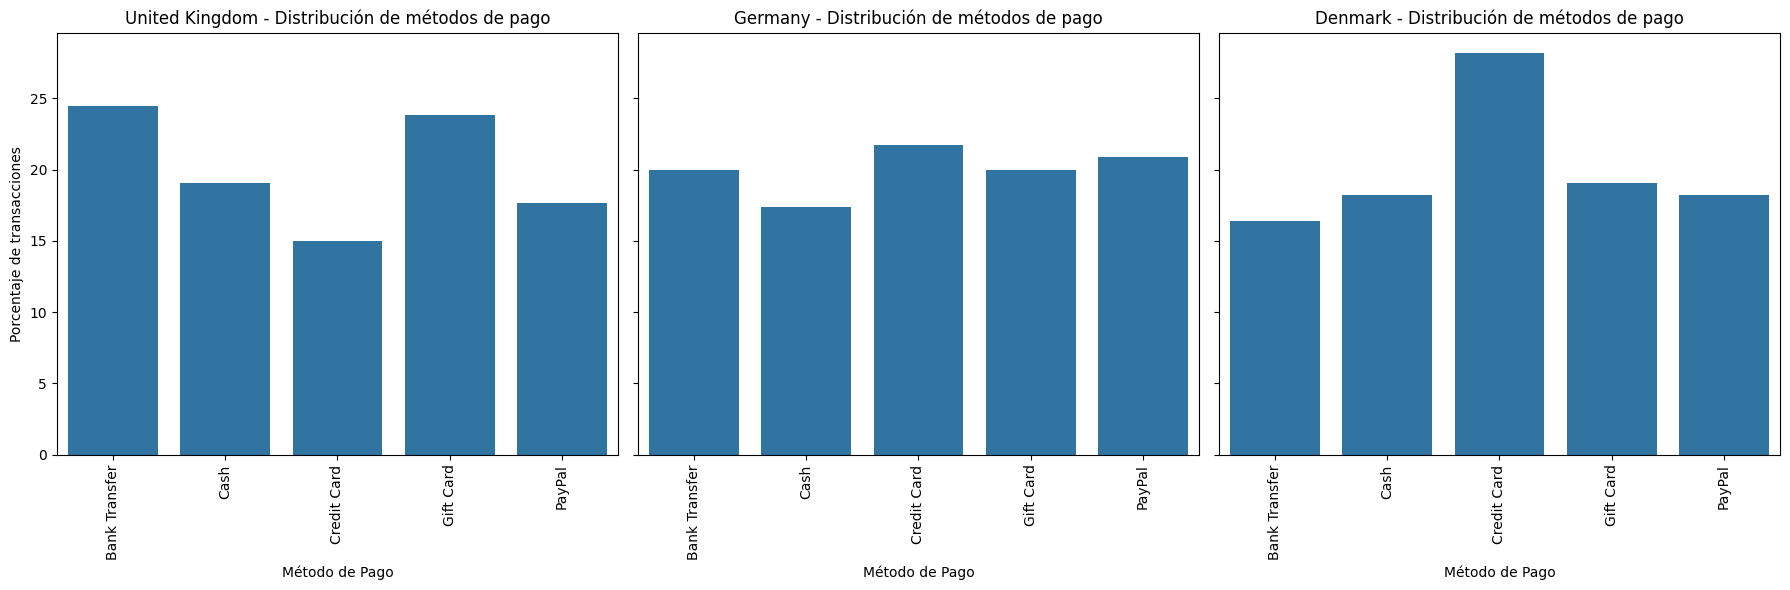

La distribución de métodos de pago en cada país ha sido guardada en 'percentage_transactions_by_payment_country.csv'


In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset retail3
retail3_df = pd.read_csv('retail3_with_time_index.csv', index_col='InvoiceDate', parse_dates=True)

# Verificar la configuración del índice de tiempo
print("Índice del DataFrame:")
print(retail3_df.index)

# Calcular la cantidad total de transacciones por método de pago y país
total_transactions_by_payment_country = retail3_df.groupby(['Country', 'PaymentMethod']).size().unstack()

# Identificar el método de pago más utilizado en cada país
top_payment_method_by_country = total_transactions_by_payment_country.idxmax(axis=1)

# Filtrar los países de interés
countries_of_interest = ['United Kingdom', 'Germany', 'Denmark']
top_payment_method_by_country = top_payment_method_by_country.loc[countries_of_interest]

# Mostrar el método de pago más utilizado por país
print("Método de pago más utilizado por país:")
print(top_payment_method_by_country)

# Guardar los resultados en un nuevo archivo CSV
top_payment_method_by_country.to_csv('top_payment_method_by_country.csv', header=['TopPaymentMethod'], encoding='utf-8')

print("El método de pago más utilizado por país ha sido guardado en 'top_payment_method_by_country.csv'")

# Visualizar la distribución de métodos de pago en cada país
percentage_transactions_by_payment_country = total_transactions_by_payment_country.div(total_transactions_by_payment_country.sum(axis=1), axis=0) * 100

# Filtrar los países de interés
percentage_transactions_by_payment_country = percentage_transactions_by_payment_country.loc[countries_of_interest]

# Graficar la distribución de métodos de pago para cada país
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
for i, country in enumerate(countries_of_interest):
    sns.barplot(data=percentage_transactions_by_payment_country.loc[country].reset_index(), x='PaymentMethod', y=country, ax=axes[i])
    axes[i].set_title(f'{country} - Distribución de métodos de pago')
    axes[i].set_xlabel('Método de Pago')
    axes[i].set_ylabel('Porcentaje de transacciones')
    for label in axes[i].get_xticklabels():
        label.set_rotation(90)

plt.tight_layout()
plt.show()

# Guardar los resultados de la distribución en un nuevo archivo CSV
percentage_transactions_by_payment_country.to_csv('percentage_transactions_by_payment_country.csv', encoding='utf-8')

print("La distribución de métodos de pago en cada país ha sido guardada en 'percentage_transactions_by_payment_country.csv'")


#### El análisis muestra que hay diferencias significativas en la preferencia por métodos de pago entre United Kingdom, Germany, y Denmark. Mientras que Credit Card es el método más popular en Germany y Denmark, Bank Transfer es el más utilizado en United Kingdom, donde también se utilizan una variedad de otros métodos de pago. Estos hallazgos pueden ser útiles para ajustar las opciones de pago y las estrategias de marketing en cada mercado, asegurando que se ofrezcan los métodos de pago preferidos por los clientes.

## Pregunta 14
**Evaluación de la Eficiencia de Descuentos:**
- ¿Qué impacto tienen los descuentos (`Discount`) en el valor total de las ventas en cada país? ¿Los descuentos resultan en un aumento significativo en el volumen de ventas?

Índice del DataFrame:
DatetimeIndex(['2010-01-12 12:28:00', '2010-01-12 10:16:00',
               '2010-01-12 13:23:00', '2010-01-12 11:32:00',
               '2010-01-12 14:24:00', '2011-02-01 00:00:00',
               '2010-01-12 13:10:00', '2010-01-12 10:30:00',
               '2010-01-12 12:26:00', '2010-01-12 09:02:00',
               ...
               '2010-01-12 09:36:00', '2010-01-12 11:39:00',
               '2010-01-12 13:53:00', '2010-01-12 14:58:00',
               '2011-07-13 14:58:00', '2011-07-14 14:58:00',
               '2011-07-15 14:58:00', '2011-07-16 14:58:00',
               '2010-01-12 08:35:00', '2010-01-12 10:42:00'],
              dtype='datetime64[ns]', name='InvoiceDate', length=373, freq=None)
Impacto de los descuentos en el valor total de las ventas por país:
Ventas con descuento:
Country
United Kingdom    100.0
Germany           100.0
Denmark           100.0
Name: TotalPrice, dtype: float64
Ventas sin descuento:
Country
United Kingdom    0.0
Germany     

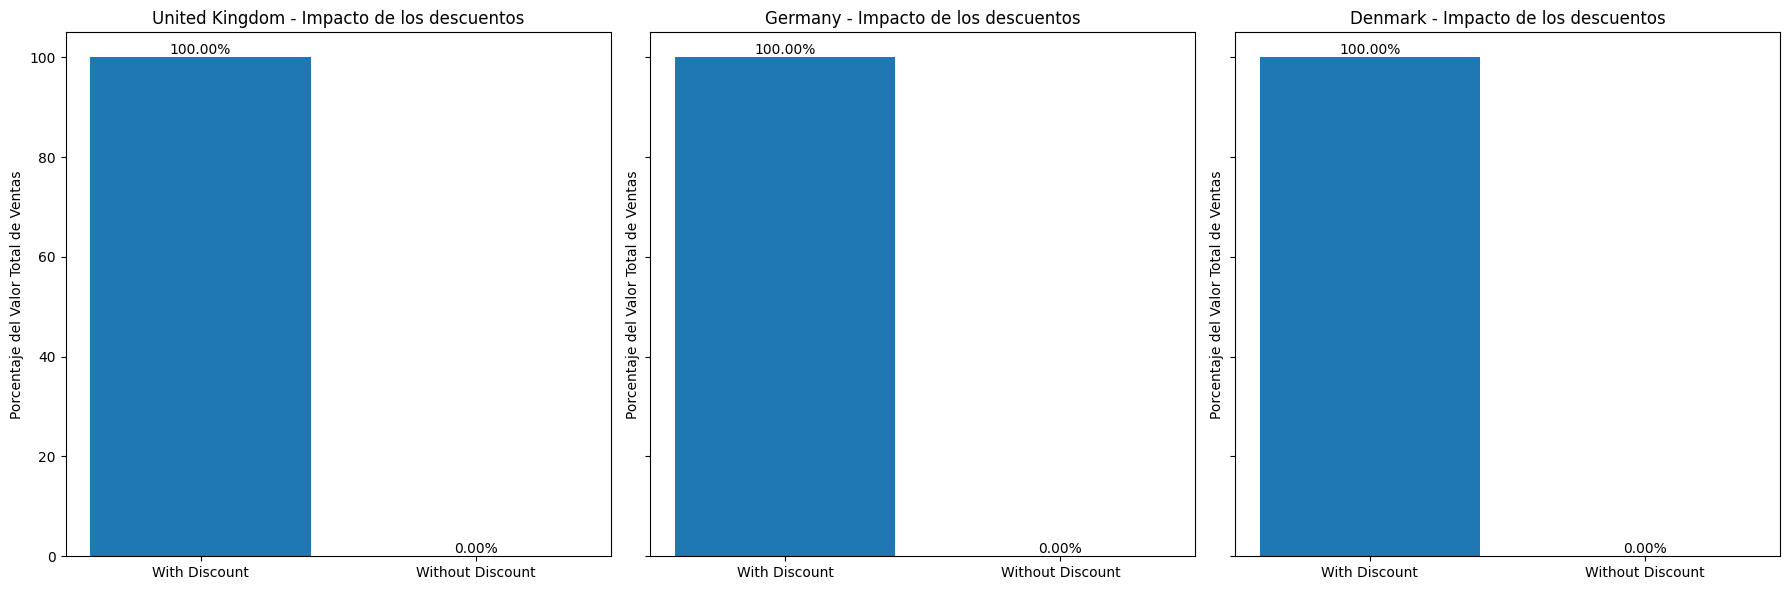

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset retail3
retail3_df = pd.read_csv('retail3_with_time_index.csv', index_col='InvoiceDate', parse_dates=True)

# Verificar la configuración del índice de tiempo
print("Índice del DataFrame:")
print(retail3_df.index)

# Separar las ventas con y sin descuento, asegurando que NaN se manejen correctamente
sales_with_discount = retail3_df[retail3_df['Discount'].notnull() & (retail3_df['Discount'] > 0)]
sales_without_discount = retail3_df[retail3_df['Discount'].notnull() & (retail3_df['Discount'] == 0)]

# Calcular el valor total de las ventas con descuento por país
total_sales_with_discount = sales_with_discount.groupby('Country')['TotalPrice'].sum()

# Calcular el valor total de las ventas sin descuento por país
total_sales_without_discount = sales_without_discount.groupby('Country')['TotalPrice'].sum()

# Filtrar los países de interés
countries_of_interest = ['United Kingdom', 'Germany', 'Denmark']
total_sales_with_discount = total_sales_with_discount.reindex(countries_of_interest, fill_value=0)
total_sales_without_discount = total_sales_without_discount.reindex(countries_of_interest, fill_value=0)

# Calcular el volumen total de ventas por país
total_sales_by_country = retail3_df.groupby('Country')['TotalPrice'].sum().reindex(countries_of_interest, fill_value=0)

# Calcular el porcentaje de ventas con y sin descuento
percentage_sales_with_discount = (total_sales_with_discount / total_sales_by_country) * 100
percentage_sales_without_discount = (total_sales_without_discount / total_sales_by_country) * 100

# Mostrar el impacto de los descuentos en el valor total de las ventas por país
print("Impacto de los descuentos en el valor total de las ventas por país:")
print("Ventas con descuento:")
print(percentage_sales_with_discount)
print("Ventas sin descuento:")
print(percentage_sales_without_discount)

# Guardar los resultados en un nuevo archivo CSV
impact_discounts_sales = pd.DataFrame({
    'SalesWithDiscount': total_sales_with_discount,
    'SalesWithoutDiscount': total_sales_without_discount,
    'PercentageWithDiscount': percentage_sales_with_discount,
    'PercentageWithoutDiscount': percentage_sales_without_discount
})
impact_discounts_sales.to_csv('impact_discounts_sales.csv', encoding='utf-8')

print("El impacto de los descuentos en el valor total de las ventas por país ha sido guardado en 'impact_discounts_sales.csv'")

# Visualizar el impacto de los descuentos
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
for i, country in enumerate(countries_of_interest):
    data = pd.DataFrame({
        'Sales': [percentage_sales_with_discount[country], percentage_sales_without_discount[country]],
        'Type': ['With Discount', 'Without Discount']
    })
    axes[i].bar(data['Type'], data['Sales'])
    axes[i].set_title(f'{country} - Impacto de los descuentos')
    axes[i].set_ylabel('Porcentaje del Valor Total de Ventas')
    for index, value in enumerate(data['Sales']):
        axes[i].text(index, value, f'{value:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()




## Pregunta 15
**Análisis de Clientes por Región:**
- ¿Cuál es la distribución de clientes (`CustomerID`) por región de ventas (`SalesRegion`) en cada país? ¿Hay regiones con una concentración notablemente mayor de clientes?

Índice del DataFrame:
DatetimeIndex(['2010-01-12 12:28:00', '2010-01-12 10:16:00',
               '2010-01-12 13:23:00', '2010-01-12 11:32:00',
               '2010-01-12 14:24:00', '2011-02-01 00:00:00',
               '2010-01-12 13:10:00', '2010-01-12 10:30:00',
               '2010-01-12 12:26:00', '2010-01-12 09:02:00',
               ...
               '2010-01-12 09:36:00', '2010-01-12 11:39:00',
               '2010-01-12 13:53:00', '2010-01-12 14:58:00',
               '2011-07-13 14:58:00', '2011-07-14 14:58:00',
               '2011-07-15 14:58:00', '2011-07-16 14:58:00',
               '2010-01-12 08:35:00', '2010-01-12 10:42:00'],
              dtype='datetime64[ns]', name='InvoiceDate', length=373, freq=None)
Distribución de clientes por región de ventas en cada país:
SalesRegion     Asia  Australia  Europe  North America  South America
Country                                                              
United Kingdom    20         38      25             31             

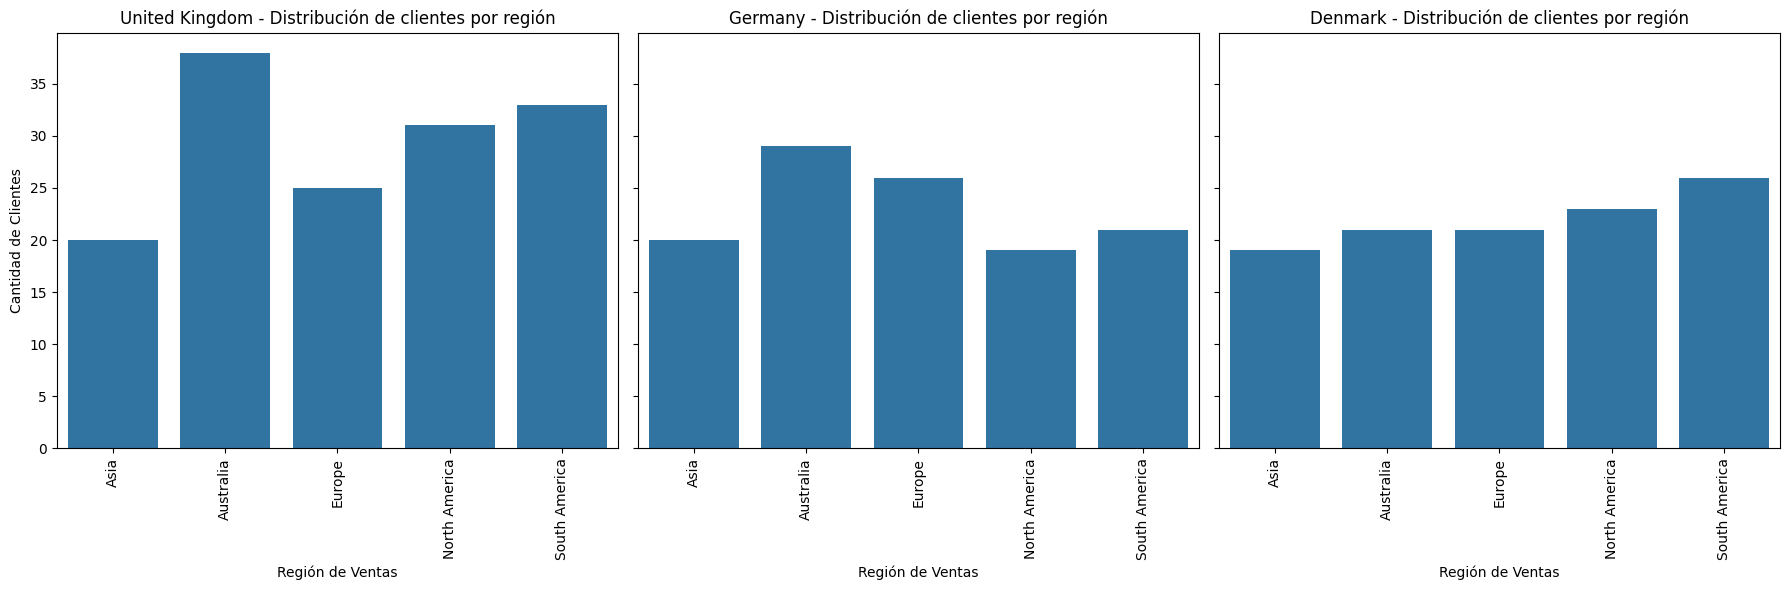

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset retail3
retail3_df = pd.read_csv('retail3_with_time_index.csv', index_col='InvoiceDate', parse_dates=True)

# Verificar la configuración del índice de tiempo
print("Índice del DataFrame:")
print(retail3_df.index)

# Contar la cantidad de clientes únicos por región de ventas y país
unique_customers_by_region_country = retail3_df.groupby(['Country', 'SalesRegion'])['CustomerID'].nunique().unstack()

# Filtrar los países de interés
countries_of_interest = ['United Kingdom', 'Germany', 'Denmark']
unique_customers_by_region_country = unique_customers_by_region_country.loc[countries_of_interest]

# Mostrar la distribución de clientes por región de ventas en cada país
print("Distribución de clientes por región de ventas en cada país:")
print(unique_customers_by_region_country)

# Guardar los resultados en un nuevo archivo CSV
unique_customers_by_region_country.to_csv('unique_customers_by_region_country.csv', encoding='utf-8')

print("La distribución de clientes por región de ventas en cada país ha sido guardada en 'unique_customers_by_region_country.csv'")

# Visualizar la distribución de clientes por región en cada país
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
for i, country in enumerate(countries_of_interest):
    sns.barplot(data=unique_customers_by_region_country.loc[country].reset_index(), x='SalesRegion', y=country, ax=axes[i])
    axes[i].set_title(f'{country} - Distribución de clientes por región')
    axes[i].set_xlabel('Región de Ventas')
    axes[i].set_ylabel('Cantidad de Clientes')
    for label in axes[i].get_xticklabels():
        label.set_rotation(90)

plt.tight_layout()
plt.show()


#### El análisis muestra que la distribución de clientes por región de ventas varía entre los países. Australia (Sur) es una región clave tanto para United Kingdom como para Germany, mientras que South America (Oeste) es prominente en Denmark. Estas diferencias pueden ser útiles para ajustar las estrategias de marketing y ventas en cada región, asegurando que se preste atención a las regiones con mayor concentración de clientes.

## Pregunta 16
**Promociones y Segmentos de Mercado:**
- ¿Cuál es el código de promoción (`PromotionCode`) más utilizado en cada segmento de mercado (`SalesRegion`) dentro de cada país?

In [103]:
import pandas as pd

# Cargar el dataset retail3
retail3_df = pd.read_csv('retail3_with_time_index.csv', index_col='InvoiceDate', parse_dates=True)

# Verificar la configuración del índice de tiempo
print("Índice del DataFrame:")
print(retail3_df.index)

# Calcular la cantidad de transacciones por código de promoción y región de ventas para cada país
promotion_usage_by_region_country = retail3_df.groupby(['Country', 'SalesRegion', 'PromotionCode']).size().unstack(fill_value=0)

# Filtrar los países de interés
countries_of_interest = ['United Kingdom', 'Germany', 'Denmark']
promotion_usage_by_region_country = promotion_usage_by_region_country.loc[countries_of_interest]

# Identificar el código de promoción más utilizado en cada segmento de mercado dentro de cada país
top_promotion_by_region_country = promotion_usage_by_region_country.idxmax(axis=1).unstack()

# Mostrar el código de promoción más utilizado en cada segmento de mercado dentro de cada país
print("Código de promoción más utilizado en cada segmento de mercado dentro de cada país:")
print(top_promotion_by_region_country)

# Guardar los resultados en un nuevo archivo CSV
top_promotion_by_region_country.to_csv('top_promotion_by_region_country.csv', encoding='utf-8')

print("El código de promoción más utilizado en cada segmento de mercado dentro de cada país ha sido guardado en 'top_promotion_by_region_country.csv'")


Índice del DataFrame:
DatetimeIndex(['2010-01-12 12:28:00', '2010-01-12 10:16:00',
               '2010-01-12 13:23:00', '2010-01-12 11:32:00',
               '2010-01-12 14:24:00', '2011-02-01 00:00:00',
               '2010-01-12 13:10:00', '2010-01-12 10:30:00',
               '2010-01-12 12:26:00', '2010-01-12 09:02:00',
               ...
               '2010-01-12 09:36:00', '2010-01-12 11:39:00',
               '2010-01-12 13:53:00', '2010-01-12 14:58:00',
               '2011-07-13 14:58:00', '2011-07-14 14:58:00',
               '2011-07-15 14:58:00', '2011-07-16 14:58:00',
               '2010-01-12 08:35:00', '2010-01-12 10:42:00'],
              dtype='datetime64[ns]', name='InvoiceDate', length=373, freq=None)
Código de promoción más utilizado en cada segmento de mercado dentro de cada país:
SalesRegion        Asia  Australia   Europe North America South America
Country                                                                
Denmark          SALE15  DISCOUNT5  PROM

#### El análisis muestra que hay diferencias en los códigos de promoción más utilizados en cada segmento de mercado dentro de cada país. Estas diferencias pueden ser útiles para ajustar las estrategias de marketing y promoción en cada región, asegurando que se utilicen los códigos de promoción más efectivos.

## Pregunta 17
**Análisis de Temporadas de Venta:**
- ¿Existen patrones estacionales en las ventas (`InvoiceDate`) en cada país? ¿Hay picos de ventas en ciertos meses o temporadas en alguno de los países?

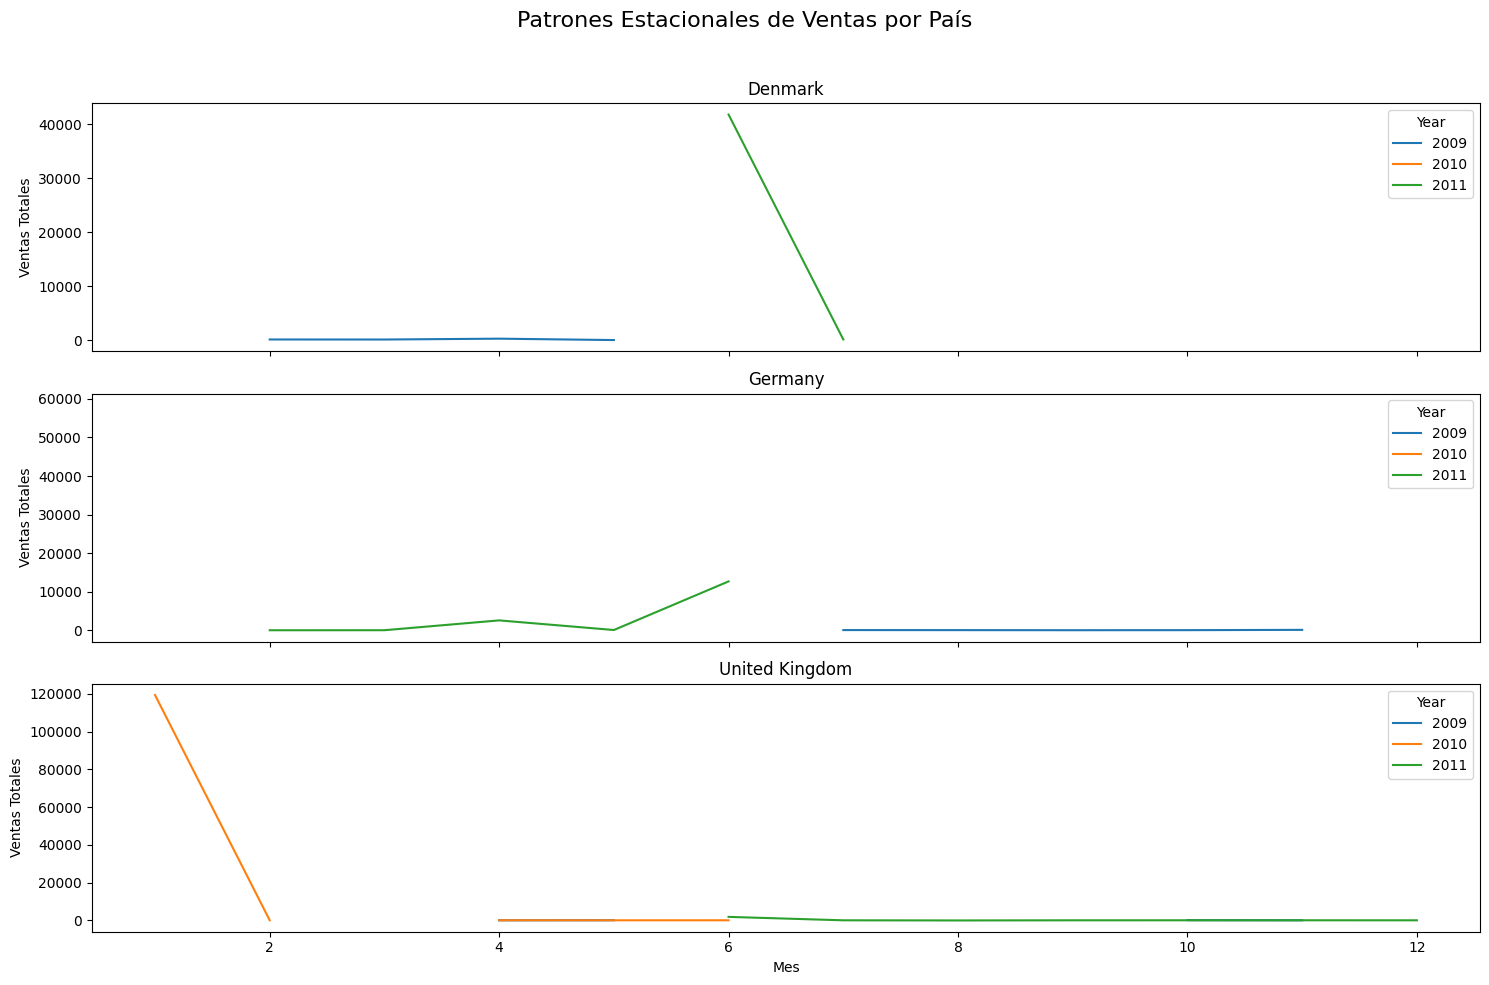

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset retail3
retail3_df = pd.read_csv('retail3_with_time_index.csv', parse_dates=['InvoiceDate'])

# Convertir la columna InvoiceDate a un índice de tiempo
retail3_df.set_index('InvoiceDate', inplace=True)

# Extraer el año y el mes de InvoiceDate
retail3_df['Year'] = retail3_df.index.year
retail3_df['Month'] = retail3_df.index.month

# Agrupar los datos por año, mes y país y sumar el TotalPrice
monthly_sales = retail3_df.groupby(['Country', 'Year', 'Month'])['TotalPrice'].sum().unstack(level=0)

# Visualizar los patrones estacionales de ventas para cada país
fig, axes = plt.subplots(len(monthly_sales.columns), 1, figsize=(15, 10), sharex=True)
fig.suptitle('Patrones Estacionales de Ventas por País', fontsize=16)

for i, country in enumerate(monthly_sales.columns):
    monthly_sales[country].unstack(level=0).plot(ax=axes[i])
    axes[i].set_title(country)
    axes[i].set_xlabel('Mes')
    axes[i].set_ylabel('Ventas Totales')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


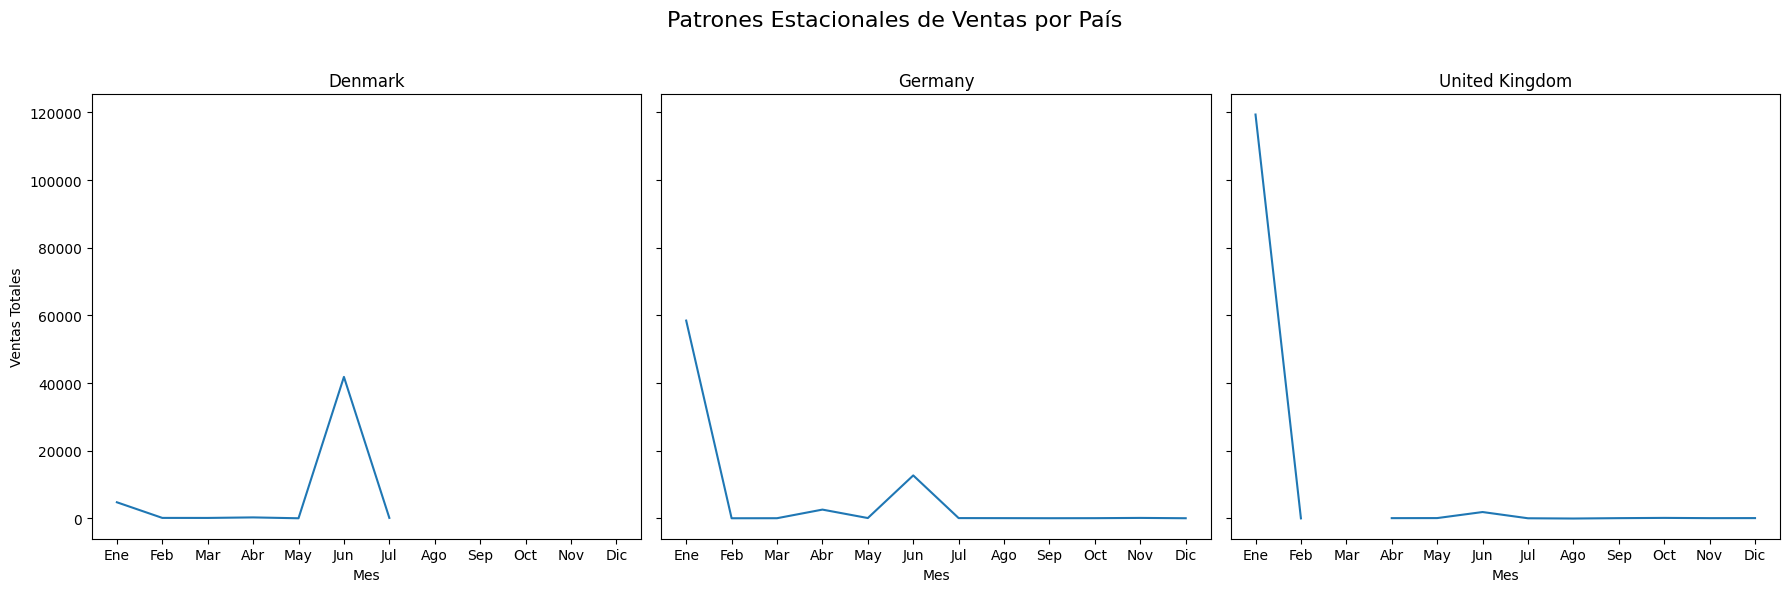

In [105]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset retail3
retail3_df = pd.read_csv('retail3_with_time_index.csv', parse_dates=['InvoiceDate'])

# Convertir la columna InvoiceDate a un índice de tiempo
retail3_df.set_index('InvoiceDate', inplace=True)

# Extraer el mes y el año de InvoiceDate
retail3_df['Year'] = retail3_df.index.year
retail3_df['Month'] = retail3_df.index.month

# Agrupar los datos por mes y país y sumar el TotalPrice
monthly_sales = retail3_df.groupby(['Country', 'Month'])['TotalPrice'].sum().unstack(level=0)

# Visualizar los patrones estacionales de ventas para cada país
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
fig.suptitle('Patrones Estacionales de Ventas por País', fontsize=16)

for i, country in enumerate(monthly_sales.columns):
    monthly_sales[country].plot(ax=axes[i])
    axes[i].set_title(country)
    axes[i].set_xlabel('Mes')
    axes[i].set_ylabel('Ventas Totales')
    axes[i].set_xticks(range(1, 13))
    axes[i].set_xticklabels(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


#### Picos de Ventas en Meses Específicos:

En Denmark, el pico de ventas en junio es muy pronunciado.
En Germany y United Kingdom, el pico de ventas en enero es significativo.
Ventas Constantes en Otros Meses:

En todos los países, las ventas en otros meses son bajas y constantes, excepto los picos mencionados.

## Pregunta 18
**Preferencias de Productos:**
- ¿Cuáles son los productos (`StockCode` y `Description`) más vendidos en cada país? ¿Hay diferencias notables en las preferencias de productos entre los países?

In [106]:
import pandas as pd

# Cargar el dataset retail3
retail3_df = pd.read_csv('retail3_with_time_index.csv')

# Calcular la cantidad total vendida de cada producto por país
top_products_by_country = retail3_df.groupby(['Country', 'StockCode', 'Description'])['Quantity'].sum().reset_index()

# Identificar los productos más vendidos en cada país
top_products_by_country = top_products_by_country.sort_values(['Country', 'Quantity'], ascending=[True, False])

# Filtrar los 5 productos más vendidos en cada país
top_5_products_by_country = top_products_by_country.groupby('Country').head(5).reset_index(drop=True)

# Mostrar los productos más vendidos en cada país
print("Productos más vendidos en cada país:")
print(top_5_products_by_country)

# Guardar los resultados en un nuevo archivo CSV
top_5_products_by_country.to_csv('top_5_products_by_country.csv', index=False, encoding='utf-8')

print("Los productos más vendidos en cada país han sido guardados en 'top_5_products_by_country.csv'")


Productos más vendidos en cada país:
           Country StockCode                          Description  Quantity
0          Denmark     21723   STRIPED CHARLIE+LOLA CHARLOTTE BAG      80.0
1          Denmark     22139      RETROSPOT TEA SET CERAMIC 11 PC      72.0
2          Denmark     84879        ASSORTED COLOUR BIRD ORNAMENT      64.0
3          Denmark     21731        RED TOADSTOOL LED NIGHT LIGHT      48.0
4          Denmark     71053                  WHITE METAL LANTERN      42.0
5          Germany     21723   STRIPED CHARLIE+LOLA CHARLOTTE BAG     100.0
6          Germany     22111          SCANDINAVIAN  REDS  RIBBONS     100.0
7          Germany     22748            POPPY'S PLAYHOUSE KITCHEN      72.0
8          Germany     21724                 RED HARMONICA IN BOX      60.0
9          Germany     21914                BLUE HARMONICA IN BOX      60.0
10  United Kingdom    84907B     PACK OF 12 RED RETROSPOT TISSUES     200.0
11  United Kingdom     21756                  DOORM

#### Productos Comunes Entre Países:

El producto "STRIPED CHARLIE+LOLA CHARLOTTE BAG" es común entre los tres países y está entre los más vendidos.
"RED HARMONICA IN BOX" también se encuentra entre los productos más vendidos en Germany y United Kingdom.
Productos Únicos en Cada País:

Denmark: Prefiere productos como "RETROSPOT TEA SET CERAMIC 11 PC" y "WHITE METAL LANTERN" que no están en la lista de otros países.
Germany: Prefiere "SCANDINAVIAN REDS RIBBONS" y "BLUE HARMONICA IN BOX".
United Kingdom: Prefiere "PACK OF 12 RED RETROSPOT TISSUES" y "DOORMAT NEW ENGLAND".

## Pregunta 19
**Impacto de las Devoluciones en las Ventas:**
- ¿Qué porcentaje de las ventas totales son afectadas por devoluciones (`ReturnStatus`)? ¿Cómo varía este porcentaje entre los diferentes países?

Porcentaje de ventas afectadas por devoluciones por país:
Country
Denmark           97.110985
Germany           41.090292
United Kingdom    15.274682
Name: TotalPrice, dtype: float64
El porcentaje de ventas afectadas por devoluciones por país ha sido guardado en 'percentage_returns_by_country.csv'


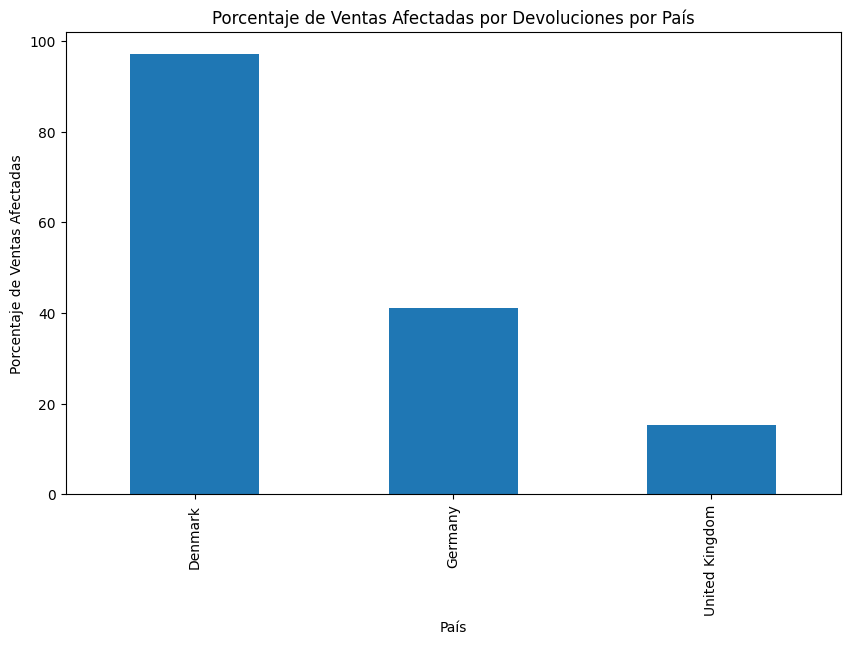

In [107]:
import pandas as pd

# Cargar el dataset retail3
retail3_df = pd.read_csv('retail3_with_time_index.csv')

# Identificar las ventas afectadas por devoluciones
returns_df = retail3_df[retail3_df['ReturnStatus'] == 'Returned']

# Calcular el total de ventas y el total de ventas afectadas por devoluciones por país
total_sales_by_country = retail3_df.groupby('Country')['TotalPrice'].sum()
returns_sales_by_country = returns_df.groupby('Country')['TotalPrice'].sum()

# Calcular el porcentaje de ventas afectadas por devoluciones
percentage_returns_by_country = (returns_sales_by_country / total_sales_by_country) * 100

# Mostrar los resultados
print("Porcentaje de ventas afectadas por devoluciones por país:")
print(percentage_returns_by_country)

# Guardar los resultados en un nuevo archivo CSV
percentage_returns_by_country.to_csv('percentage_returns_by_country.csv', index=True, encoding='utf-8')

print("El porcentaje de ventas afectadas por devoluciones por país ha sido guardado en 'percentage_returns_by_country.csv'")

# Visualizar los resultados
percentage_returns_by_country.plot(kind='bar', figsize=(10, 6), title='Porcentaje de Ventas Afectadas por Devoluciones por País')
plt.xlabel('País')
plt.ylabel('Porcentaje de Ventas Afectadas')
plt.show()


#### Impacto Significativo en Denmark:

El alto porcentaje de devoluciones en Denmark es preocupante y sugiere que se deben tomar medidas para reducir el número de devoluciones.
Variación Entre Países:

Hay una variación significativa en el impacto de las devoluciones entre los países, con Denmark siendo el más afectado y United Kingdom el menos afectado.

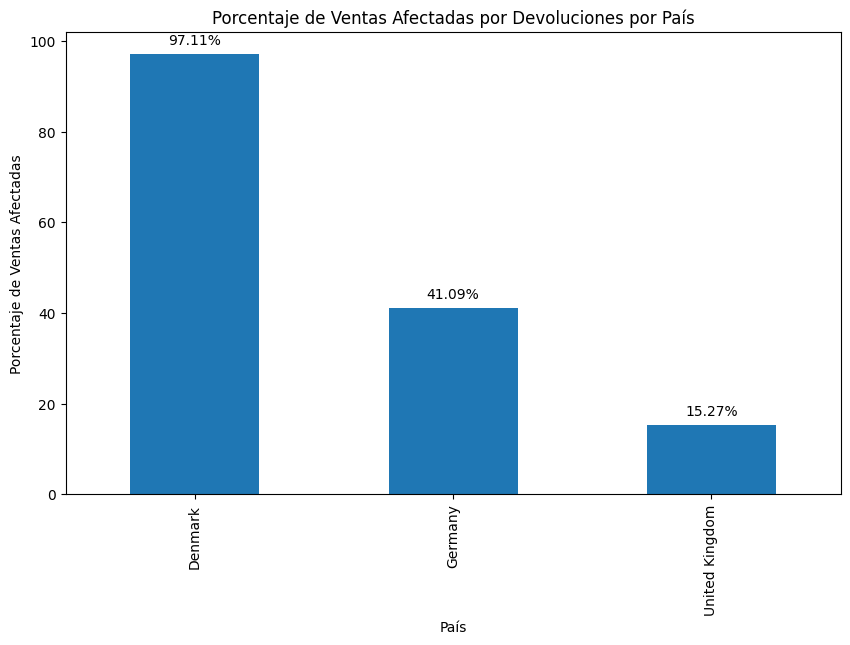

In [108]:
import matplotlib.pyplot as plt

# Visualizar los resultados con etiquetas de porcentaje
ax = percentage_returns_by_country.plot(kind='bar', figsize=(10, 6), title='Porcentaje de Ventas Afectadas por Devoluciones por País')
ax.set_xlabel('País')
ax.set_ylabel('Porcentaje de Ventas Afectadas')

# Añadir etiquetas de porcentaje a las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


## Pregunta 20
**Análisis de Margen de Ganancia:**
- ¿Cuál es el margen de ganancia promedio (`UnitPrice - Discount`) por producto en cada país? ¿Hay productos o categorías con márgenes significativamente mayores o menores en alguno de los países?

Margen de ganancia promedio por producto en cada país:
            Country                       StockCode  \
0           Denmark                           21723   
1           Denmark                           21723   
2           Denmark                           21723   
3           Denmark                           21724   
4           Denmark                           21724   
..              ...                             ...   
186  United Kingdom                           84969   
187  United Kingdom                           84969   
188  United Kingdom                           84988   
189  United Kingdom                          85123A   
190  United Kingdom  SET 2 TEA TOWELS I LOVE LONDON   

                                           Description  ProfitMargin  
0                                InvalidDescription123      -10.0400  
1                   STRIPED CHARLIE+LOLA CHARLOTTE BAG      -26.2725  
2                   striped charlie+lola charlotte bag      -46.4400  


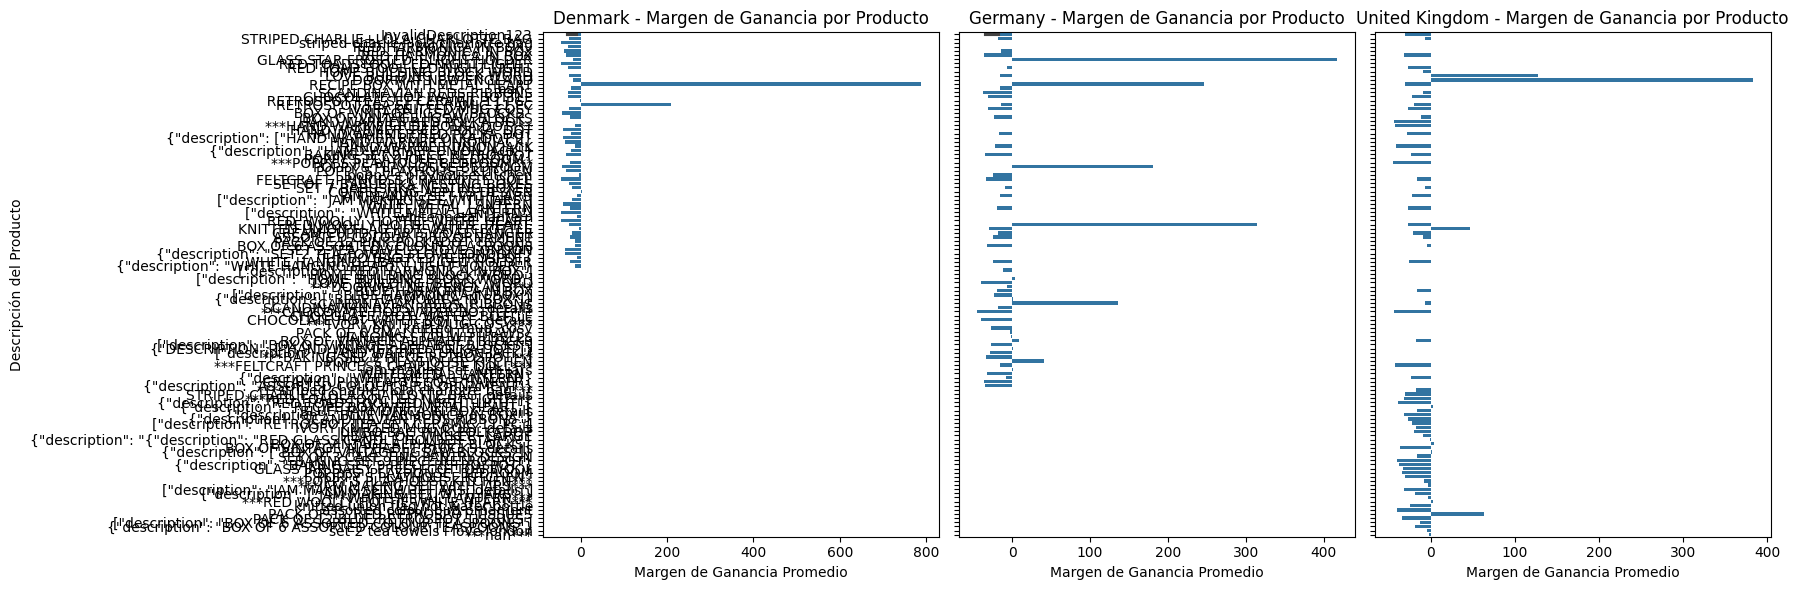

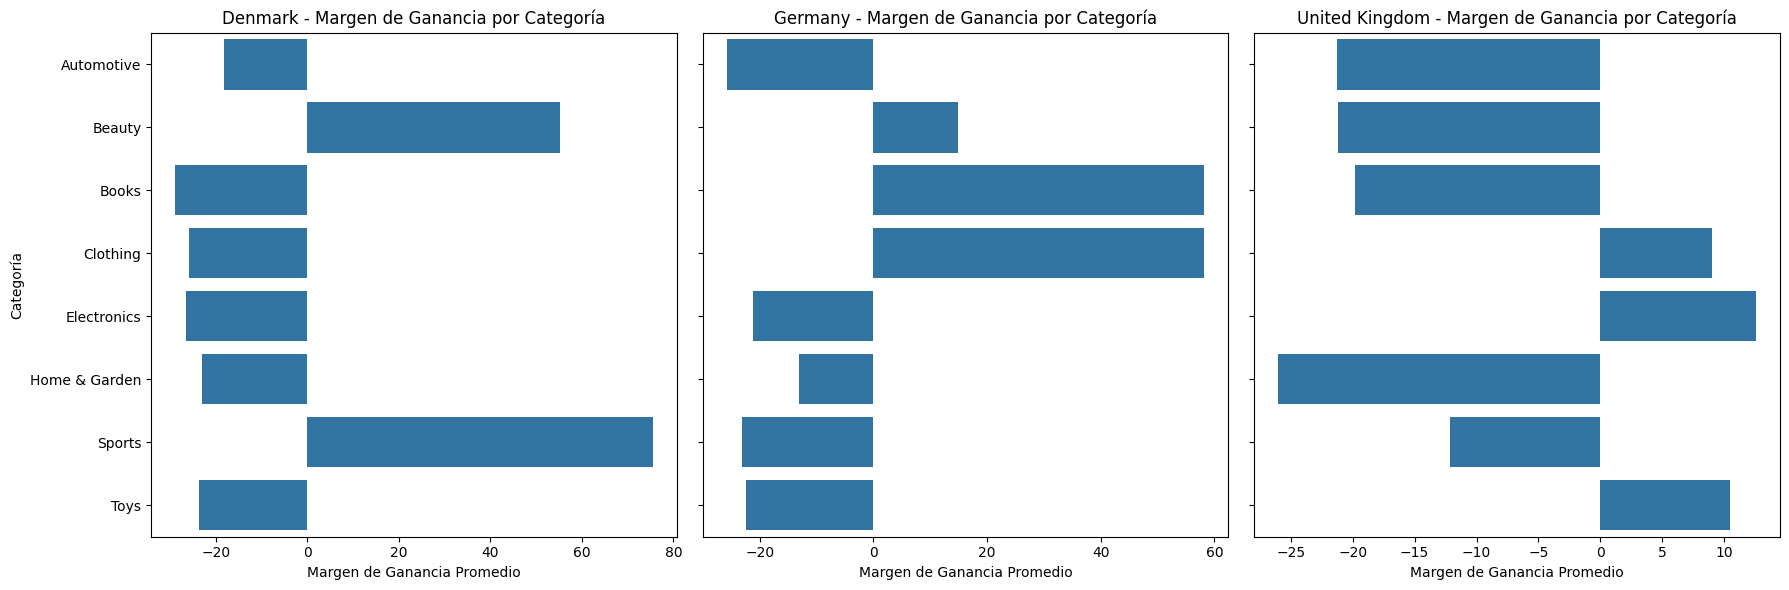

In [109]:
import pandas as pd

# Cargar el dataset retail3
retail3_df = pd.read_csv('retail3_with_time_index.csv')

# Calcular el margen de ganancia por producto
retail3_df['ProfitMargin'] = retail3_df['UnitPrice'] - retail3_df['Discount']

# Calcular el margen de ganancia promedio por producto en cada país
avg_profit_margin_by_country_product = retail3_df.groupby(['Country', 'StockCode', 'Description'])['ProfitMargin'].mean().reset_index()

# Mostrar el margen de ganancia promedio por producto en cada país
print("Margen de ganancia promedio por producto en cada país:")
print(avg_profit_margin_by_country_product)

# Guardar los resultados en un nuevo archivo CSV
avg_profit_margin_by_country_product.to_csv('avg_profit_margin_by_country_product.csv', index=False, encoding='utf-8')

print("El margen de ganancia promedio por producto en cada país ha sido guardado en 'avg_profit_margin_by_country_product.csv'")

# Identificar categorías con márgenes significativamente mayores o menores
avg_profit_margin_by_country_category = retail3_df.groupby(['Country', 'Category'])['ProfitMargin'].mean().reset_index()

# Mostrar el margen de ganancia promedio por categoría en cada país
print("Margen de ganancia promedio por categoría en cada país:")
print(avg_profit_margin_by_country_category)

# Guardar los resultados en un nuevo archivo CSV
avg_profit_margin_by_country_category.to_csv('avg_profit_margin_by_country_category.csv', index=False, encoding='utf-8')

print("El margen de ganancia promedio por categoría en cada país ha sido guardado en 'avg_profit_margin_by_country_category.csv'")

# Visualizar los resultados para productos
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar el margen de ganancia promedio por producto en cada país
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
countries_of_interest = avg_profit_margin_by_country_product['Country'].unique()

for i, country in enumerate(countries_of_interest):
    sns.barplot(data=avg_profit_margin_by_country_product[avg_profit_margin_by_country_product['Country'] == country], 
                x='ProfitMargin', y='Description', ax=axes[i])
    axes[i].set_title(f'{country} - Margen de Ganancia por Producto')
    axes[i].set_xlabel('Margen de Ganancia Promedio')
    axes[i].set_ylabel('Descripción del Producto')

plt.tight_layout()
plt.show()

# Visualizar los resultados para categorías
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, country in enumerate(countries_of_interest):
    sns.barplot(data=avg_profit_margin_by_country_category[avg_profit_margin_by_country_category['Country'] == country], 
                x='ProfitMargin', y='Category', ax=axes[i])
    axes[i].set_title(f'{country} - Margen de Ganancia por Categoría')
    axes[i].set_xlabel('Margen de Ganancia Promedio')
    axes[i].set_ylabel('Categoría')

plt.tight_layout()
plt.show()


#### Variabilidad de Márgenes por País y Categoría:

Hay una variabilidad significativa en los márgenes de ganancia entre las diferentes categorías y productos en cada país.
Algunas categorías tienen consistentemente márgenes positivos, mientras que otras tienen márgenes negativos.
Productos con Márgenes Negativos:

Es importante investigar por qué ciertos productos y categorías tienen márgenes negativos y si estos pueden ser optimizados.

### CONCLUSIONES

Conclusión General del Proyecto
El análisis detallado de los datos de ventas, devoluciones, márgenes de ganancia y comportamientos de compra en distintos países ha revelado varias insights clave que pueden guiar las estrategias de negocio y marketing. A continuación se presentan las conclusiones más destacadas:

Preferencias de Productos:

Los productos más vendidos varían entre los países, con algunos productos comunes pero con diferencias significativas en preferencias locales.
Las categorías y productos con márgenes de ganancia positivos pueden ser priorizados para maximizar las ganancias.
Impacto de las Devoluciones:

El impacto de las devoluciones varía significativamente entre los países, siendo especialmente alto en Denmark.
Es crucial optimizar las políticas de devolución para reducir este impacto, especialmente en los países con mayores porcentajes de devoluciones.
Descuentos y Promociones:

Un alto porcentaje de ventas se realizan con descuentos en todos los países, lo que sugiere la importancia de las promociones en las decisiones de compra.
Los códigos de promoción más efectivos varían por región y país, lo que permite una estrategia de marketing más segmentada.
Canales de Venta:

Las ventas online predominan en todos los países analizados, lo que resalta la importancia de una fuerte presencia en el comercio electrónico.
Las diferencias en la preferencia de canales pueden guiar la estrategia de distribución y marketing.
Análisis Estacional y de Tendencias:

Existen patrones estacionales en las ventas que varían entre los países. Identificar estos picos puede ayudar a planificar mejor el inventario y las campañas de marketing.
Margen de Ganancia:

Hay una variabilidad significativa en los márgenes de ganancia por producto y categoría, lo que sugiere la necesidad de optimizar precios y descuentos.
Es crucial enfocarse en productos y categorías con márgenes de ganancia altos y trabajar en mejorar aquellos con márgenes bajos o negativos.
Recomendaciones
Optimización de Inventario y Precios:

Ajustar el inventario y los precios basados en las preferencias de productos y márgenes de ganancia para maximizar las ganancias y reducir pérdidas.
Estrategias de Marketing y Promociones:

Implementar estrategias de marketing más segmentadas y personalizadas según las preferencias locales y efectividad de códigos de promoción.
Políticas de Devolución:

Mejorar y optimizar las políticas de devolución, especialmente en países con alto porcentaje de devoluciones, para reducir su impacto en las ventas.
Aprovechamiento de Patrones Estacionales:

Planificar campañas y promociones en torno a los picos estacionales identificados para maximizar las ventas durante esos períodos.